In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Определение функций для аппроксимации
def func1(x):
    return np.cos(2 * np.pi * x)

def func2(x):
    return 5 * x**3 + x**2 + 5

def func3(x):
    return x * np.sin(2 * np.pi * x)

In [3]:
# Функция для создания выборки с заданной функцией и ошибками измерения
def generate_sample(func, error_type, size=50):
    x = np.random.uniform(0, 2 * np.pi, size)  # Генерация x с равномерным распределением
    y_true = func(x)
    
    if error_type == 'uniform':
        noise = np.random.uniform(-0.1, 0.1, size)
    elif error_type == 'normal':
        noise = np.random.normal(0, 0.1, size)
    else:
        noise = np.zeros(size)
    
    y_noisy = y_true + noise
    
    return x, y_noisy

Реализуйте программно восстановление функциональной зависимости методом наименьших квадратов с помощью полиномиальной
регрессии. Для этого

а) используйте значения параметра M ∈ {0, 1, . . . , 15};

б) генерируйте выборку двумя способами: в первом случае моделируйте ошибку измерения как равномерно распределённую
случайную величину, во втором — как нормально распределённую случайную величину;

в) генерируйте значения х из заданного интервала случайно в соответствии с равномерным распределением

г) в качестве распознаваемых функциональных зависимостей используйте следующие:
y = cos(2πx), 
y =5x^3 + x^2 + 5, 
y =x*sin(2πx), x ∈ [0, 2π].

In [4]:
class PolynomialFeatures:
    """
    Класс предназначен для выполнения полиномиальной преобразования признаков.
    "degree" указывает на степень полинома, до которой нужно выполнять преобразование.
    """
    def __init__(self, degree):
        self.degree = degree

    def fit(self, X):
        """
        Принимает матрицу признаков X и выполняет полиномиальное преобразование до указанной степени. 
        Если degree равно 0, он возвращает столбец из единиц (первоначальные признаки без изменений). 
        В противном случае, он добавляет новые признаки в матрицу X_poly, возводя исходные признаки в степени от 2 до degree, 
        а затем объединяет их горизонтально. Это позволяет создать полиномиальные признаки нужной степени.
        """
        if self.degree == 0:
            return np.ones((X.shape[0], 1))
        else:
            X_poly = X.copy()
            for d in range(2, self.degree + 1):
                X_poly = np.hstack((X_poly, X ** d))
            return X_poly

class LinearRegression:
    """
    Простая реализация линейной регрессии
    """
    def fit(self, X, y):
        """
        Обучение модели с использованием метода наименьших квадратов для линейной регрессии.
        Создается расширенная матрица X_b, путем добавления столбца, состоящего из единиц, к матрице X.
        Это необходимо для учета свободного члена в модели линейной регрессии.
        
            X_b представляет собой матрицу "дизайна" (design matrix) для регрессии. 
            В ней содержатся признаки (features) и единичный столбец (bias term) для уравнения регрессии. 
            Таким образом, X_b имеет размерность (n_samples, n_features + 1).

            y представляет собой вектор целевых значений.
        
            Результат этого умножения - это вектор параметров theta, который является решением задачи линейной регрессии.

           self.theta содержит оценки параметров модели, полученные с использованием метода наименьших квадратов.
        """
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

In [5]:
# Функция для выполнения полиномиальной регрессии и визуализации результатов
def polynomial_regression(x, y, degree, func, error):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit(x.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    x_fit = np.linspace(0, 2 * np.pi, 100)
    X_fit = poly_features.fit(x_fit.reshape(-1, 1))
    y_fit = model.predict(X_fit)
    
    plt.scatter(x, y, label="Noisy Data")
    plt.plot(x_fit, y_fit, label=f"{func.__name__}, Polynomial Degree {degree}", color='red')
    plt.title(f"{func.__name__}, {error}, Degree {degree}")

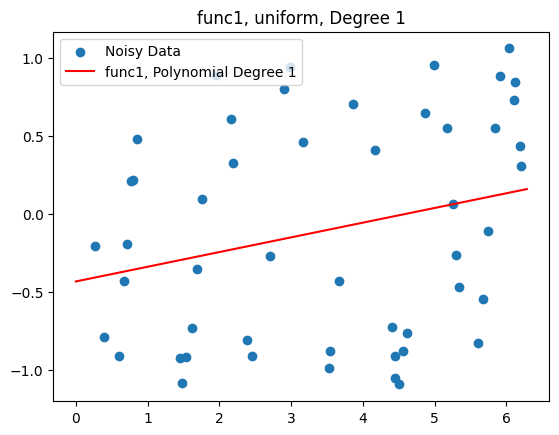

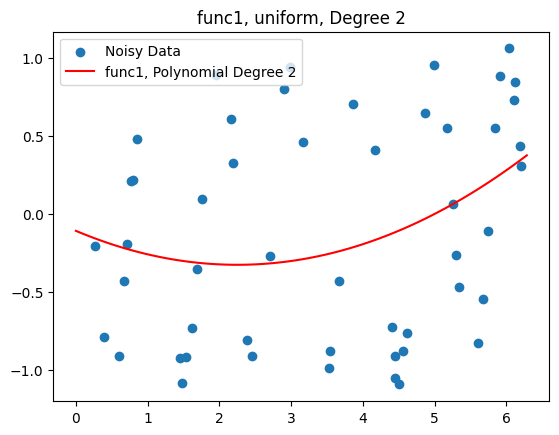

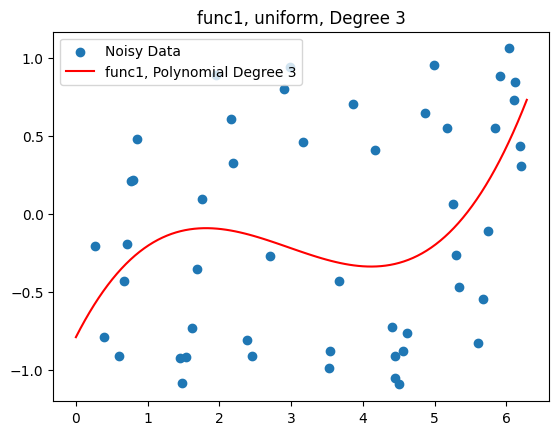

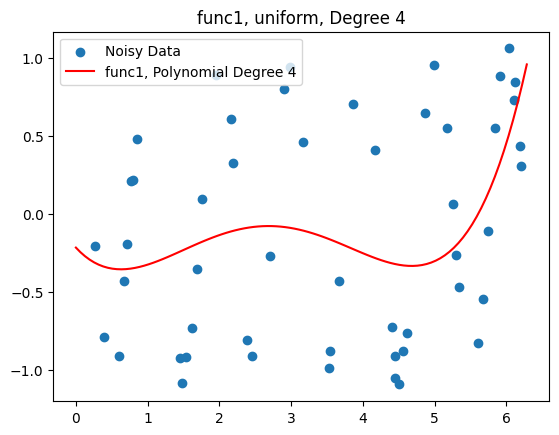

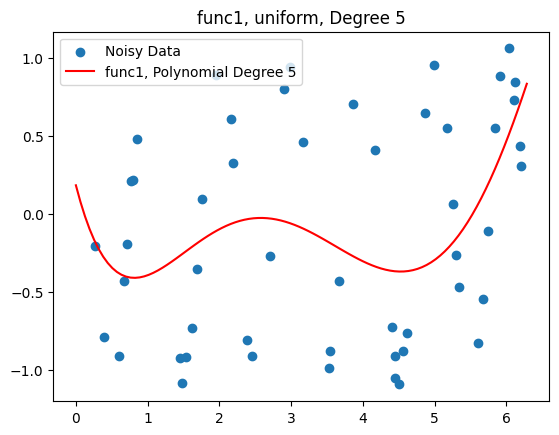

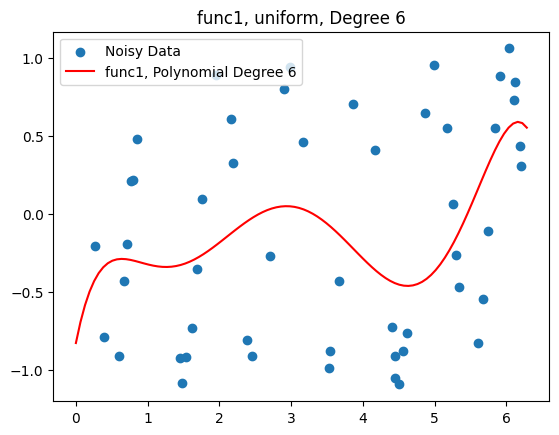

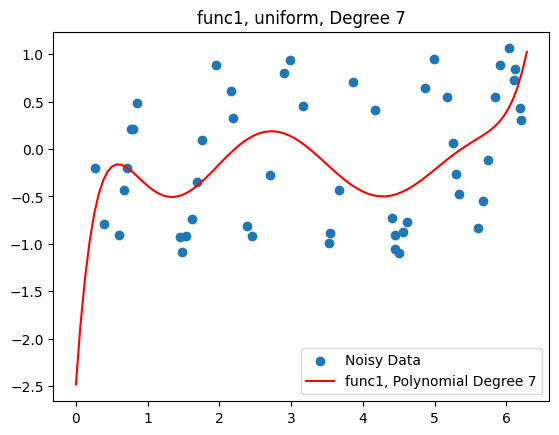

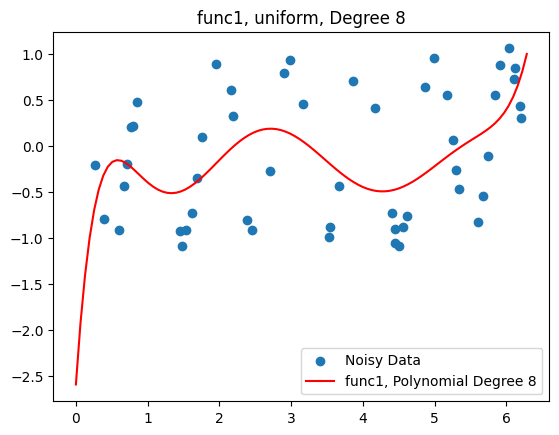

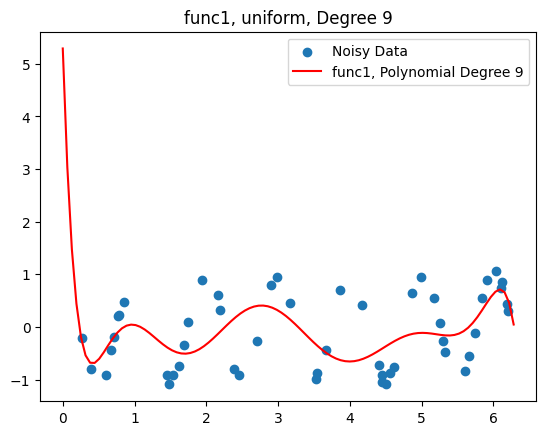

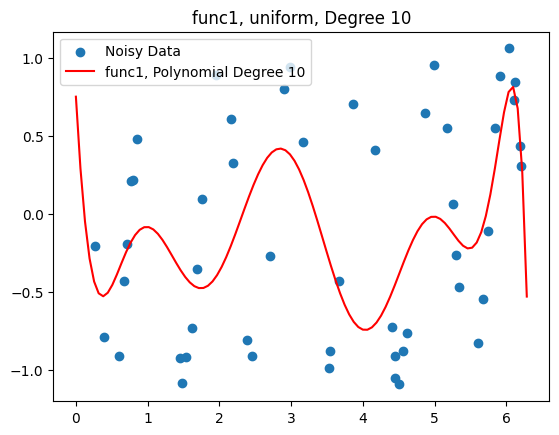

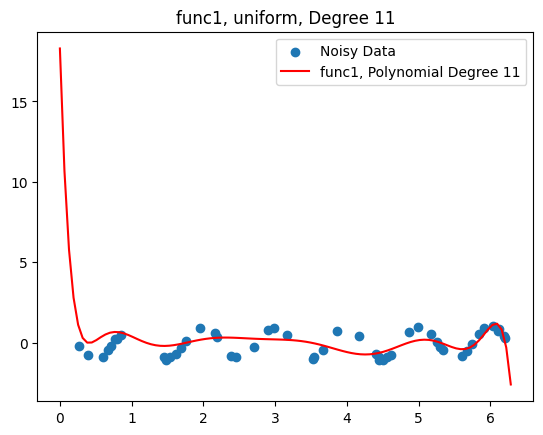

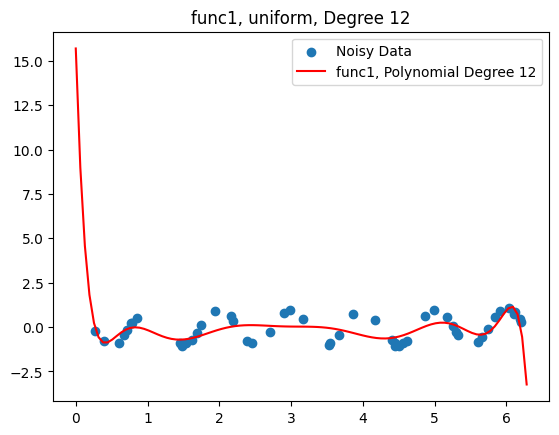

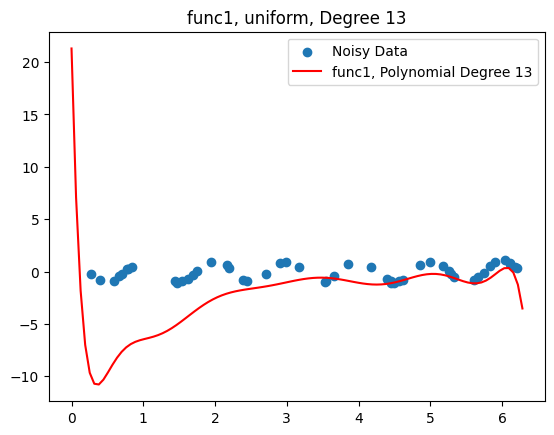

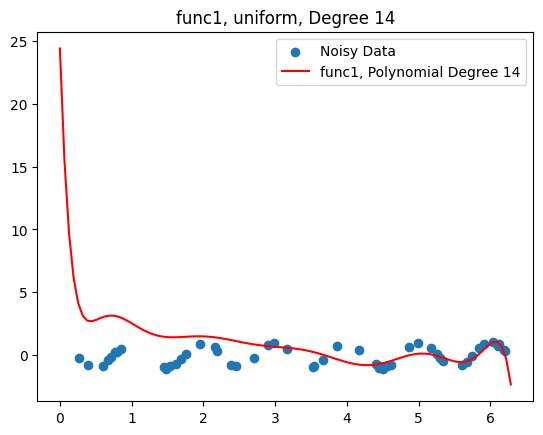

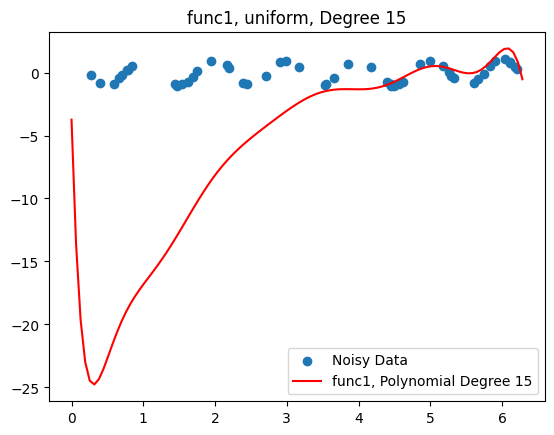

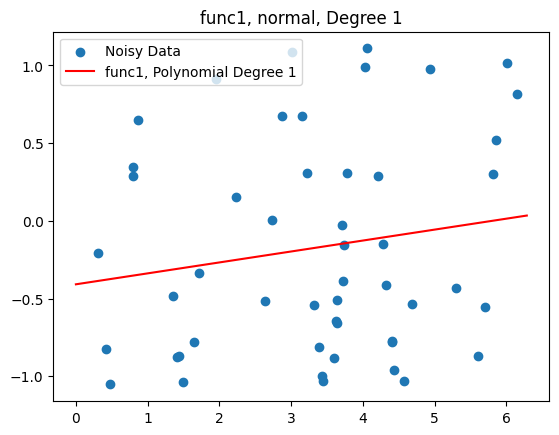

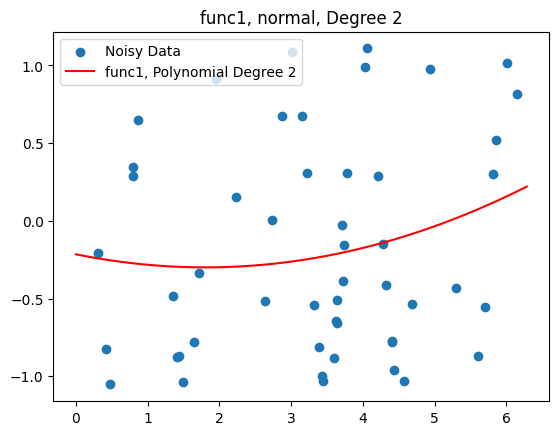

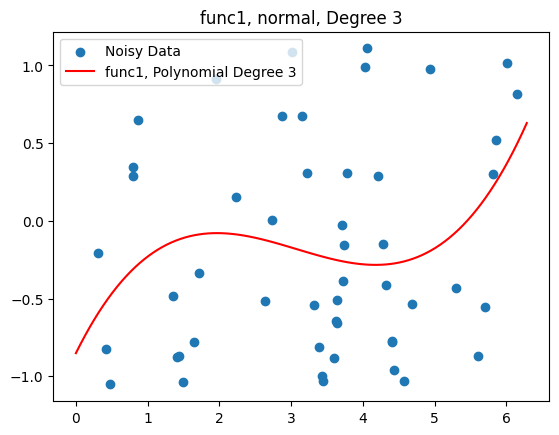

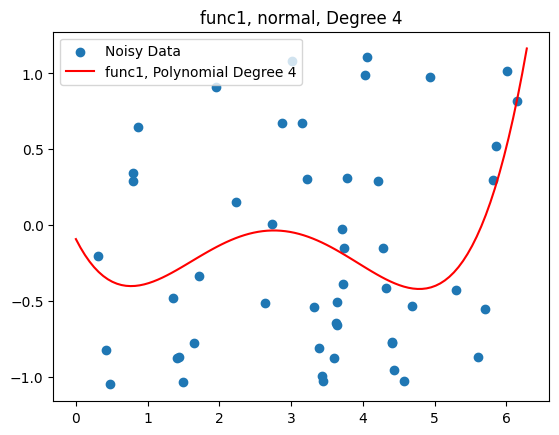

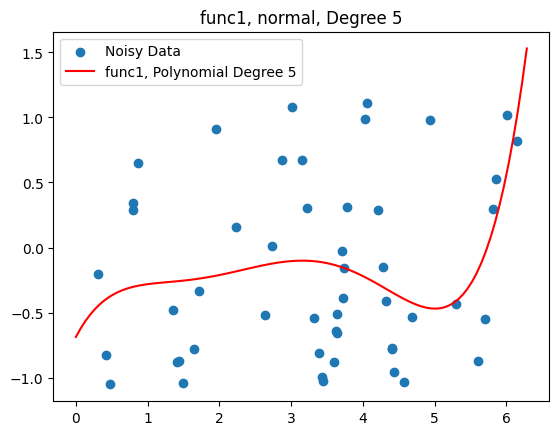

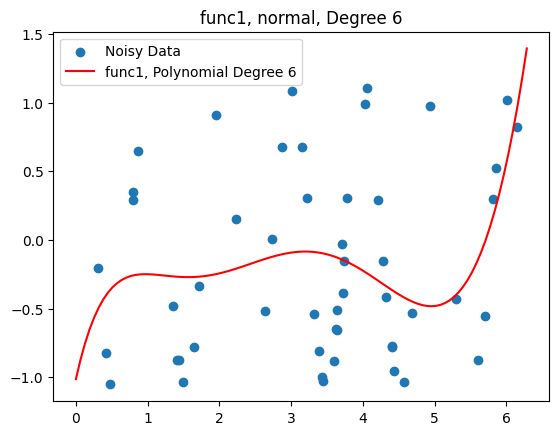

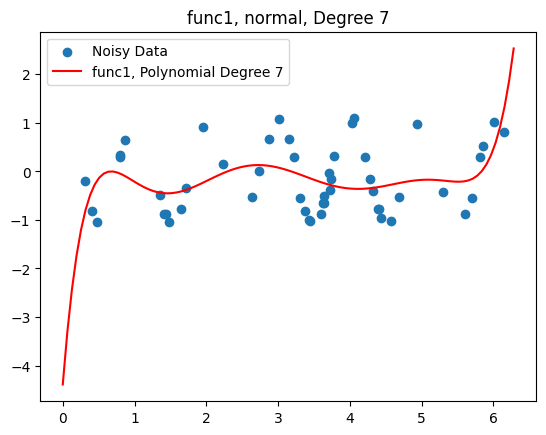

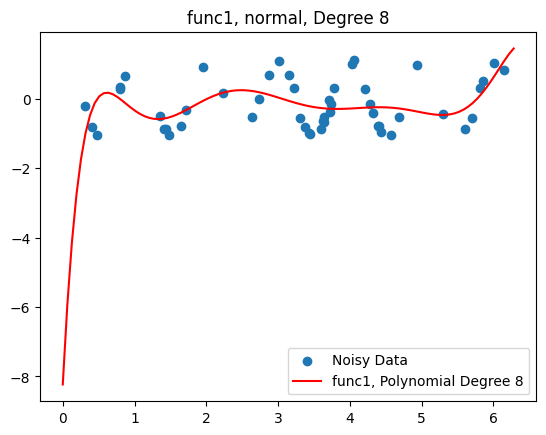

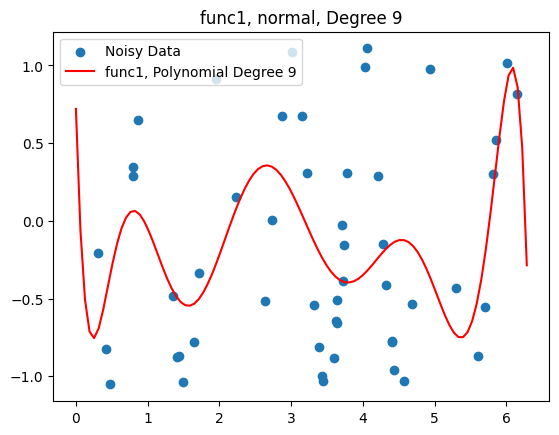

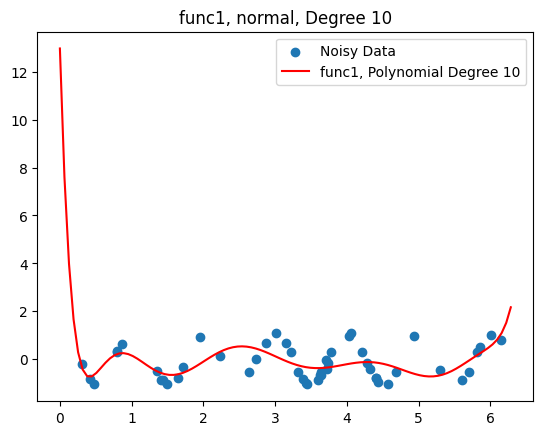

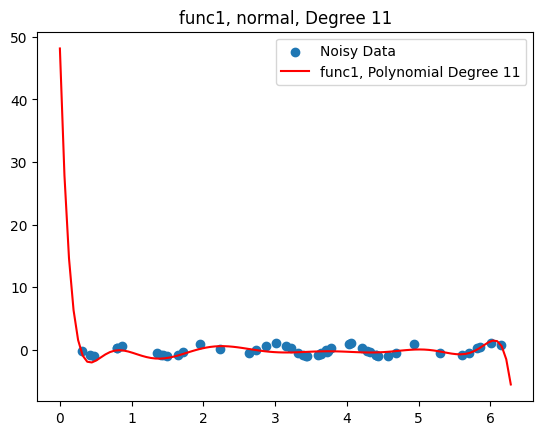

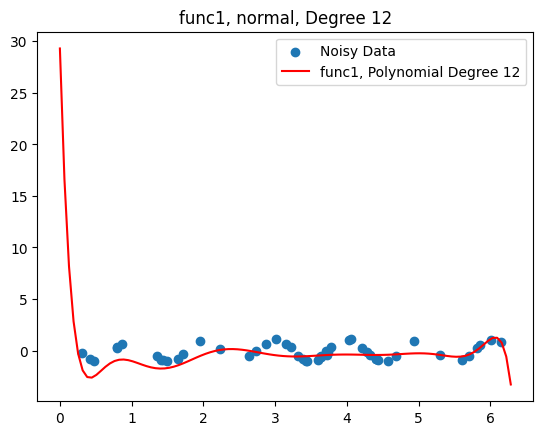

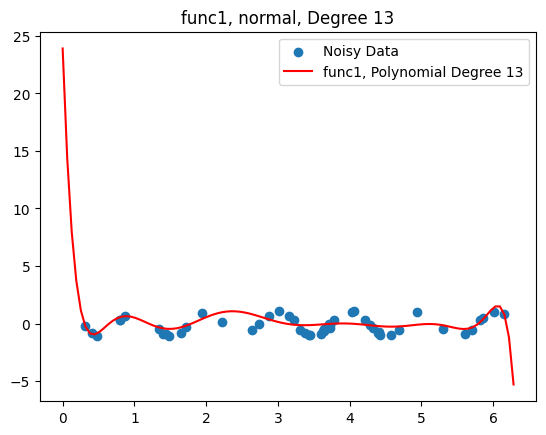

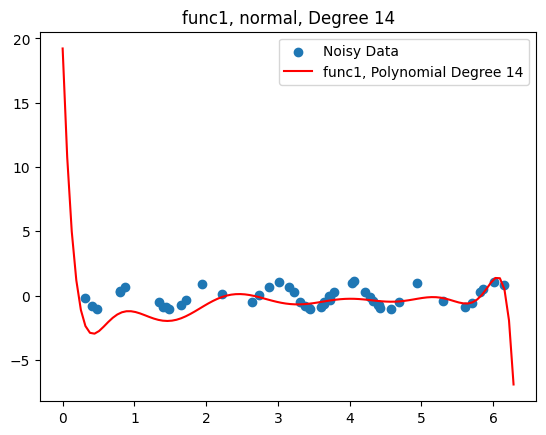

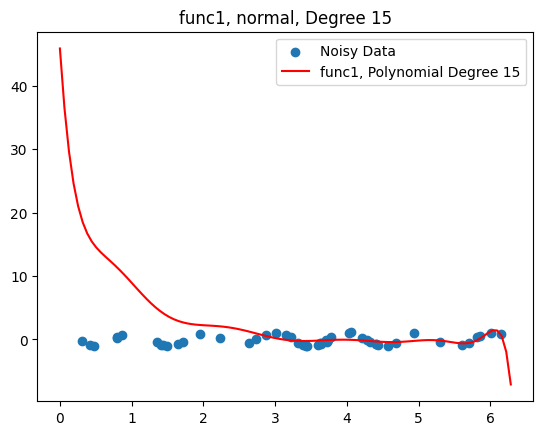

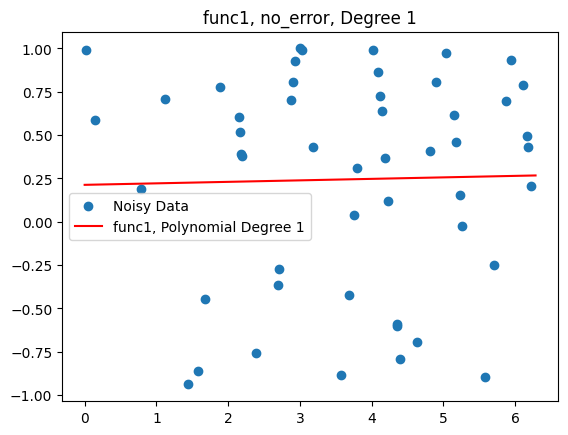

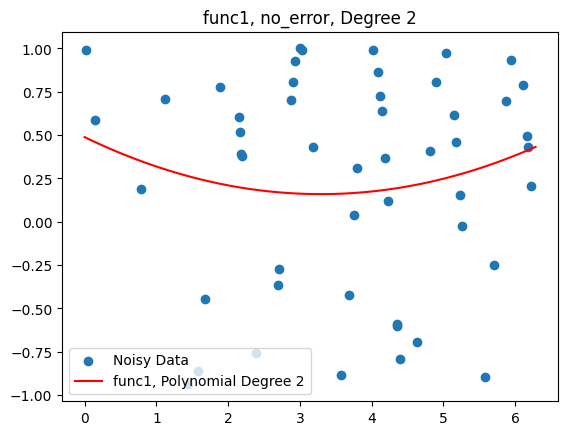

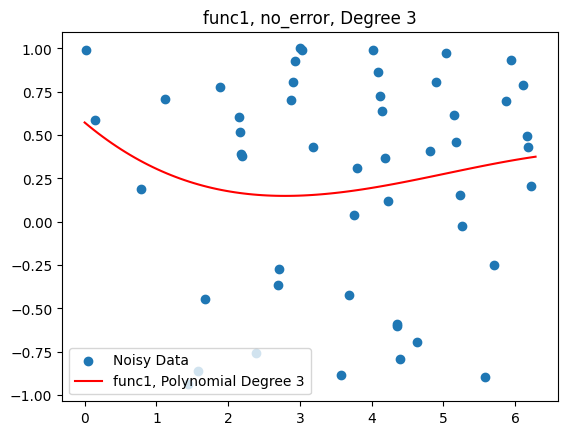

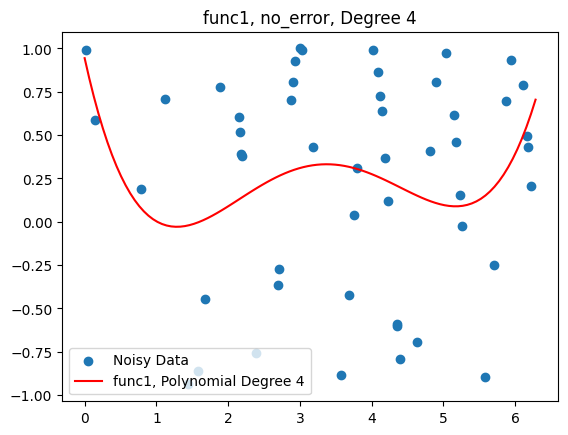

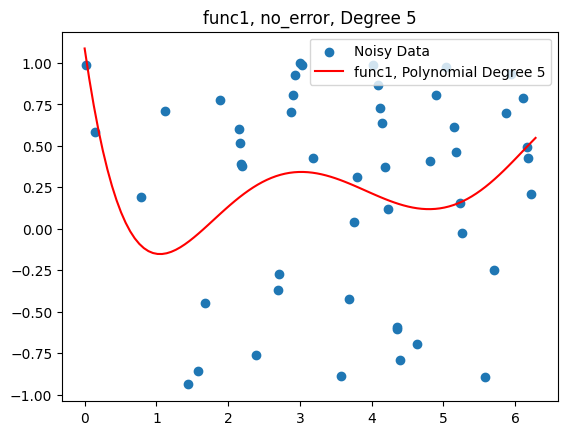

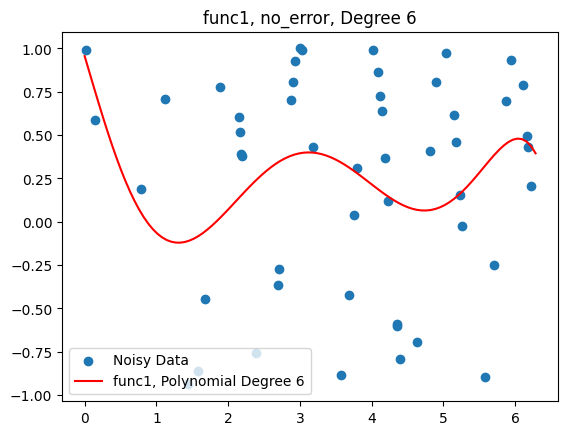

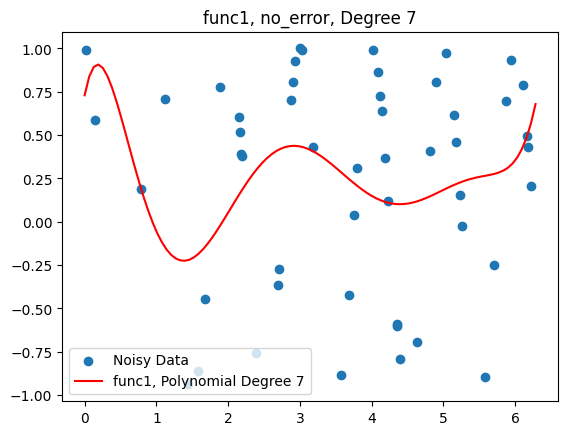

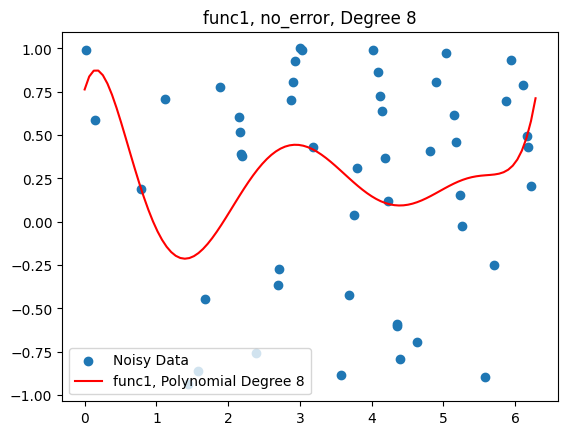

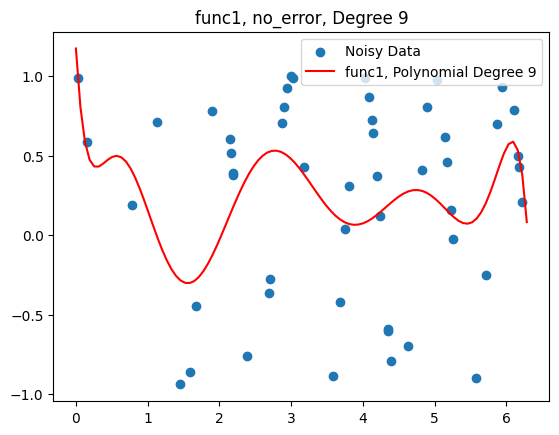

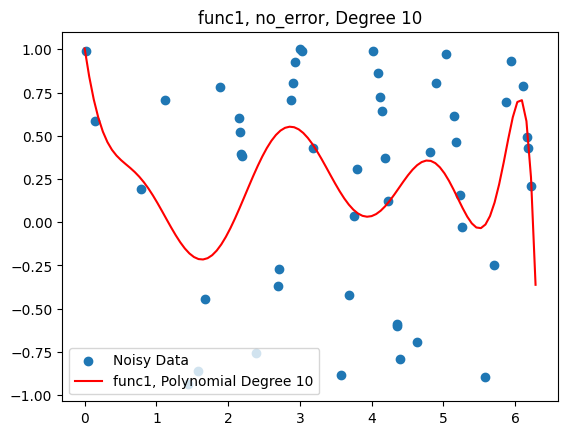

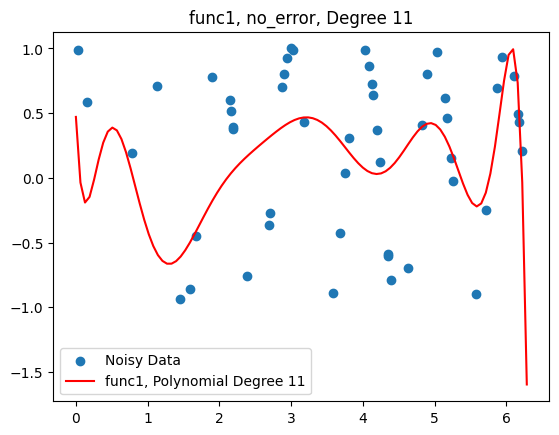

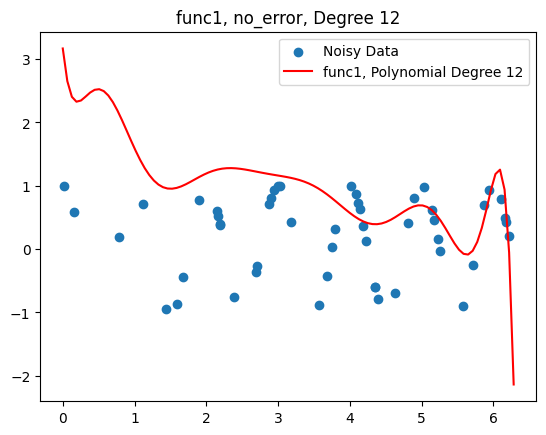

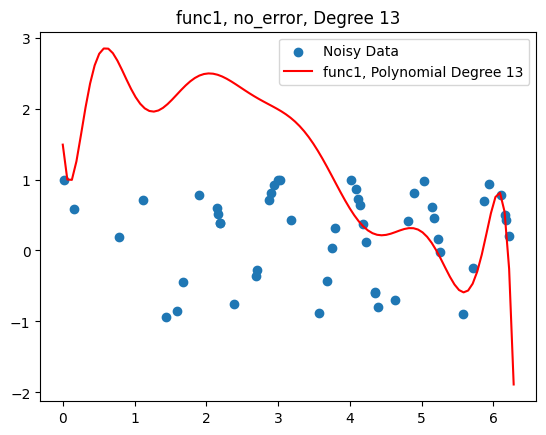

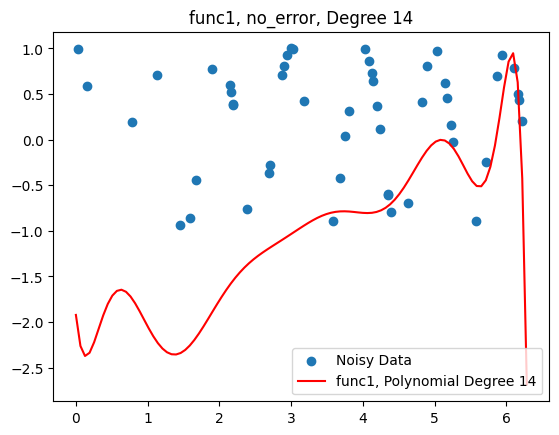

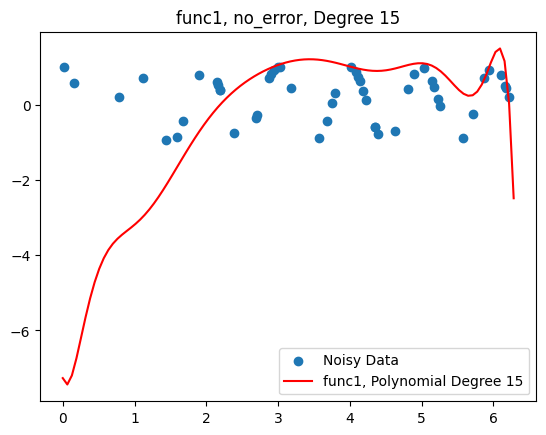

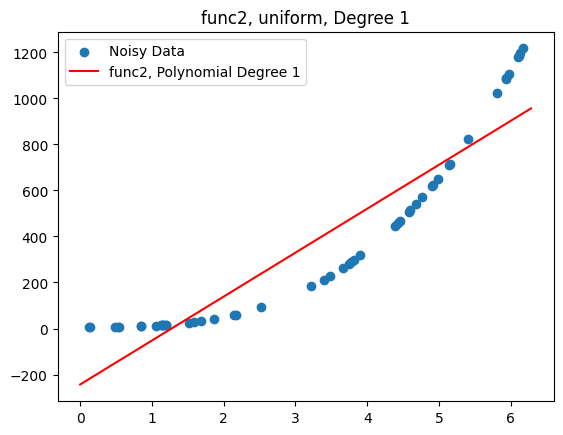

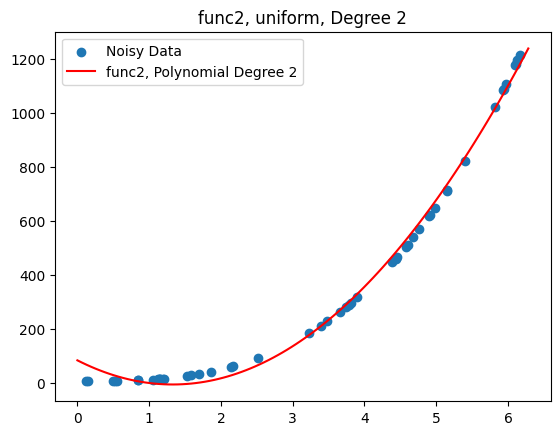

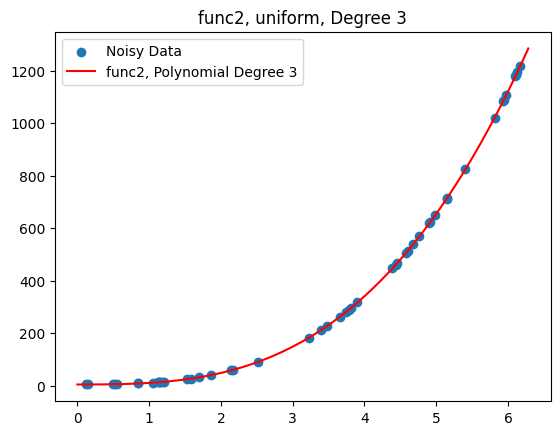

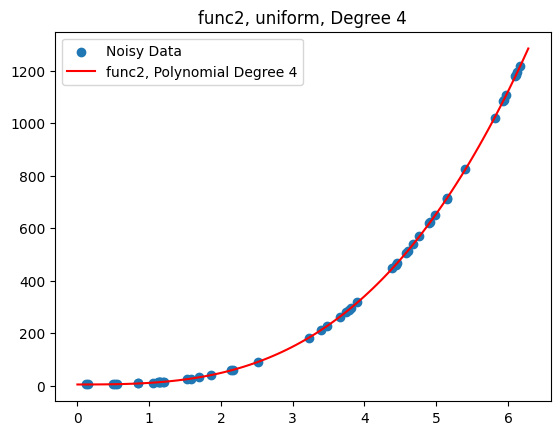

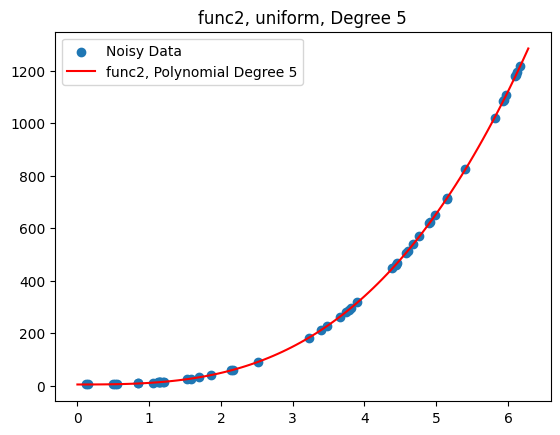

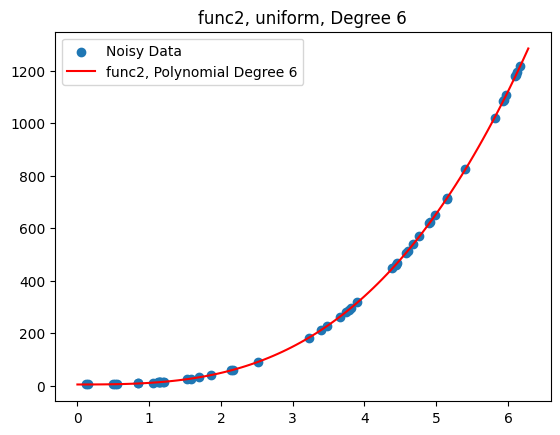

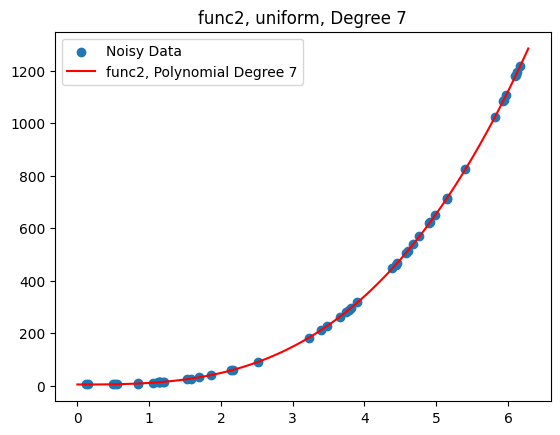

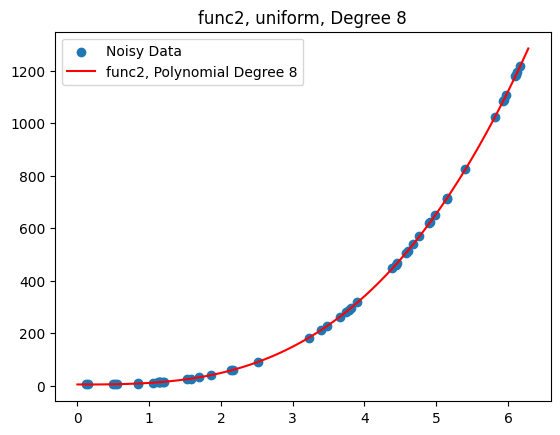

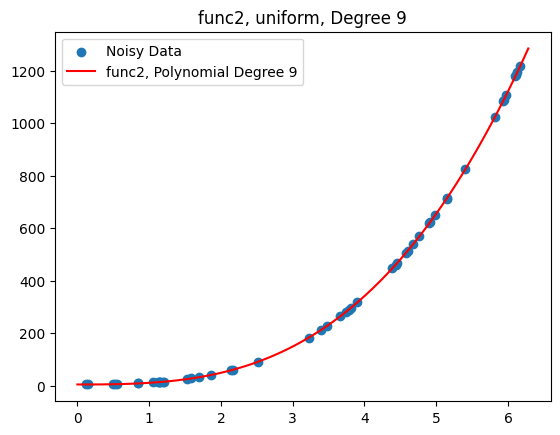

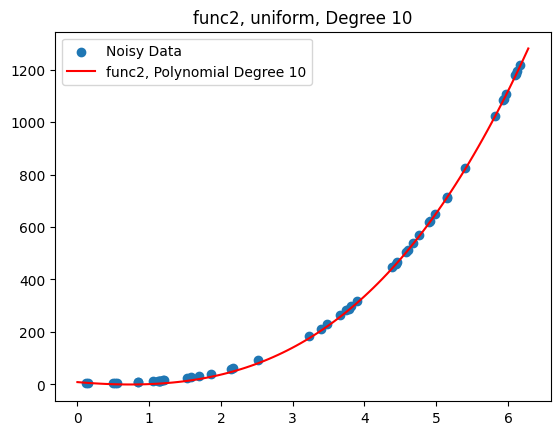

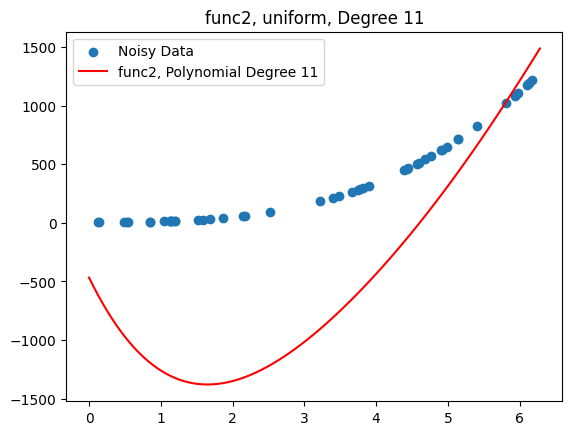

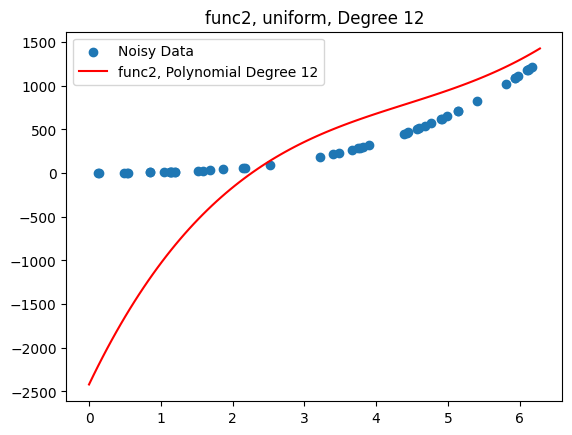

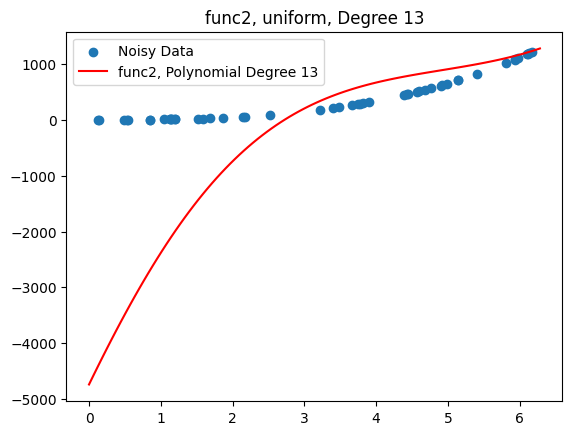

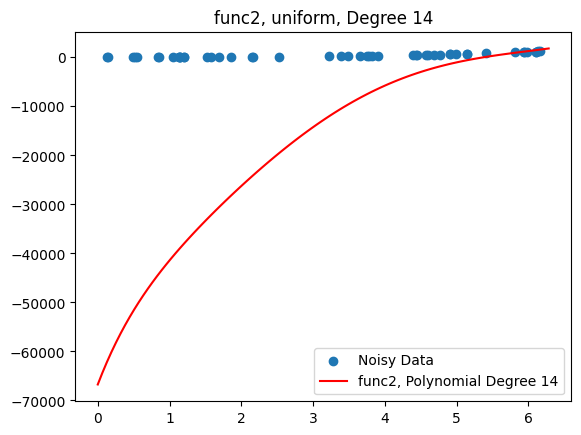

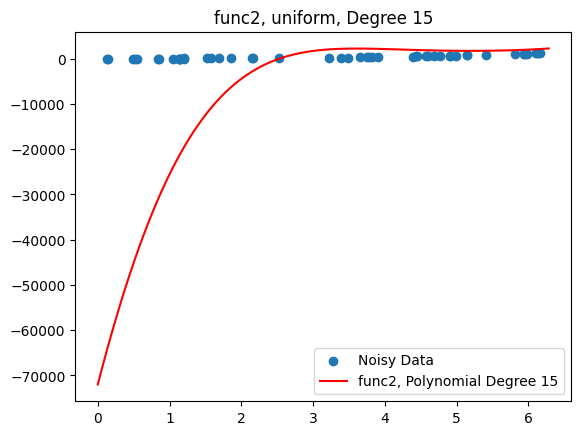

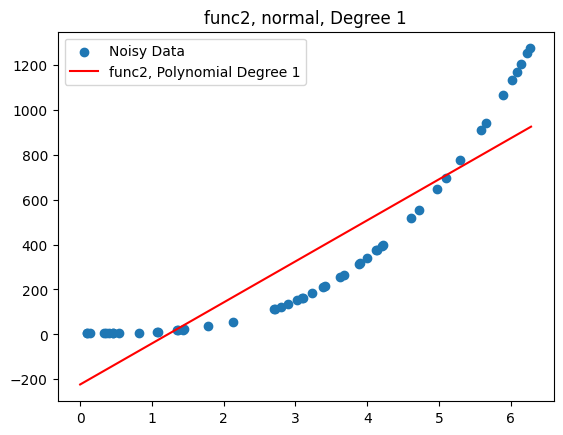

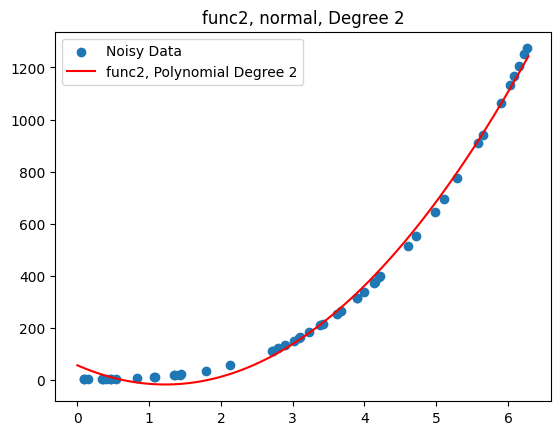

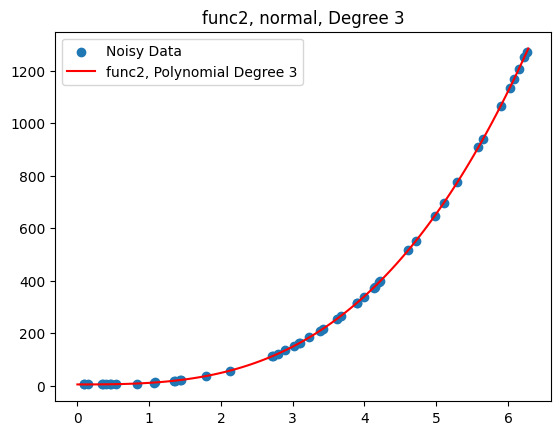

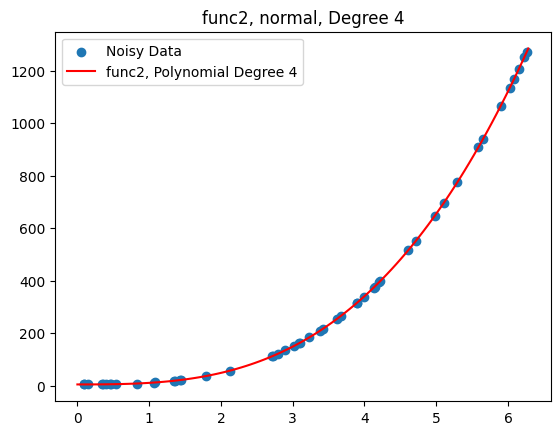

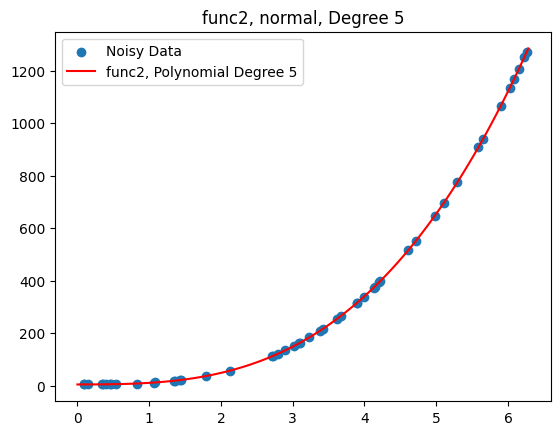

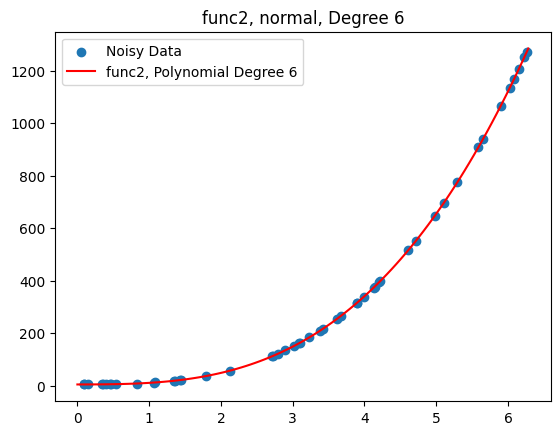

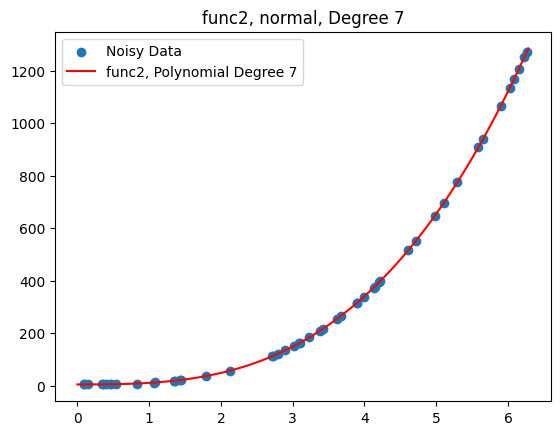

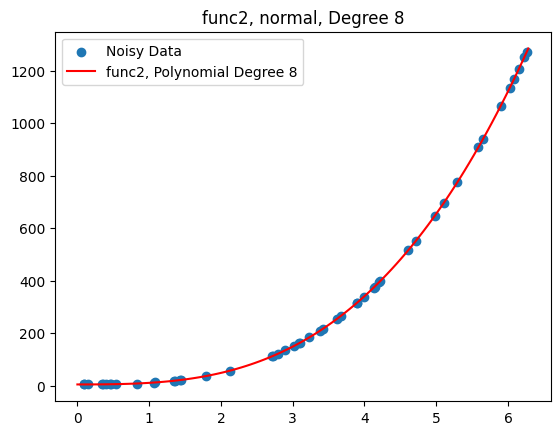

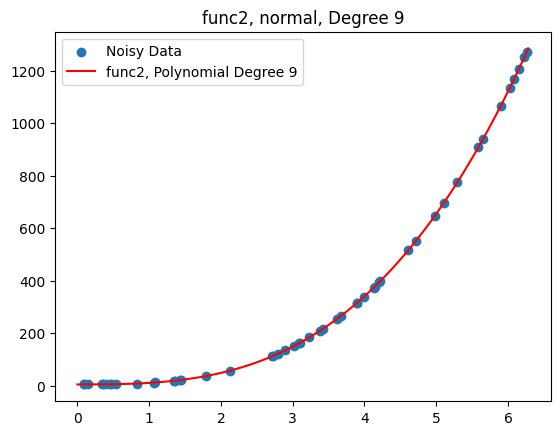

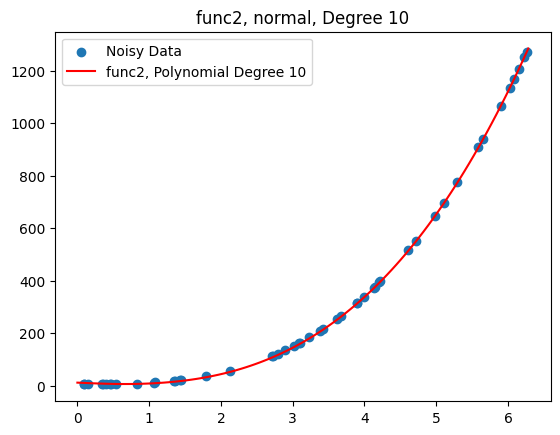

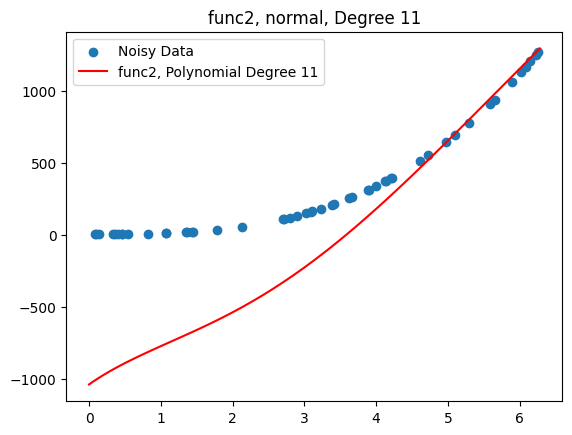

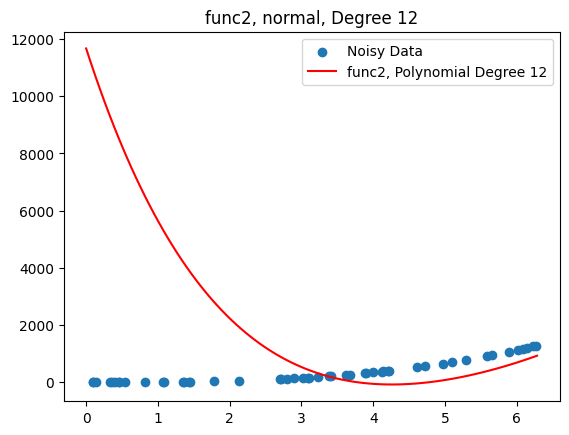

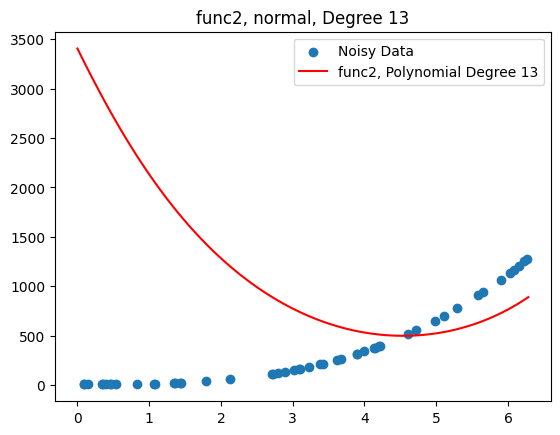

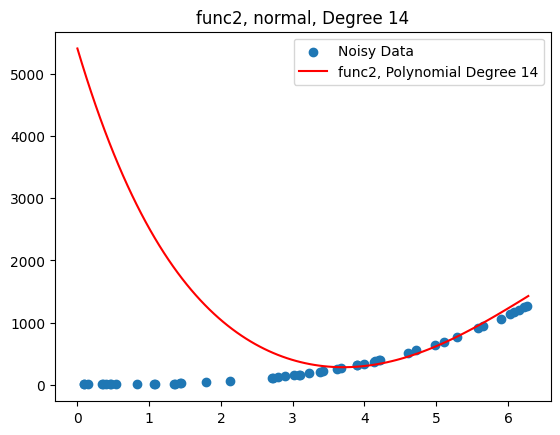

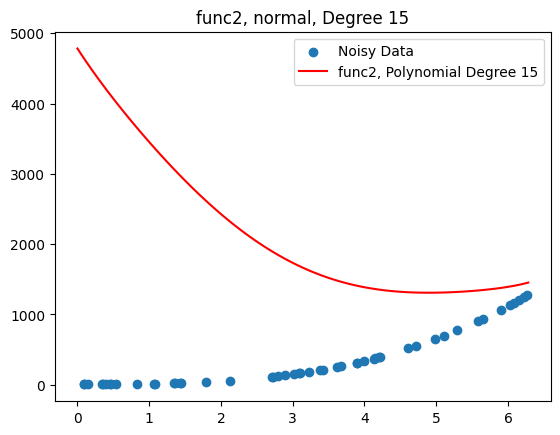

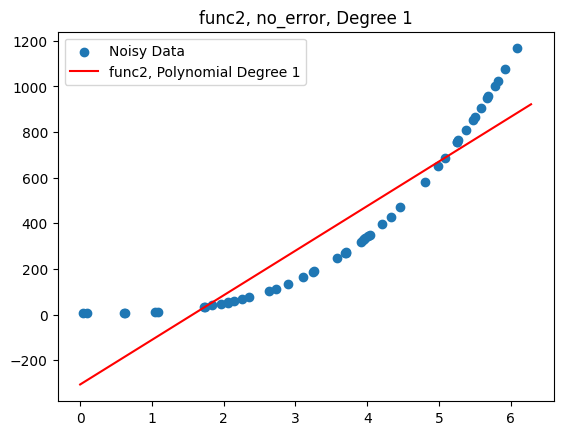

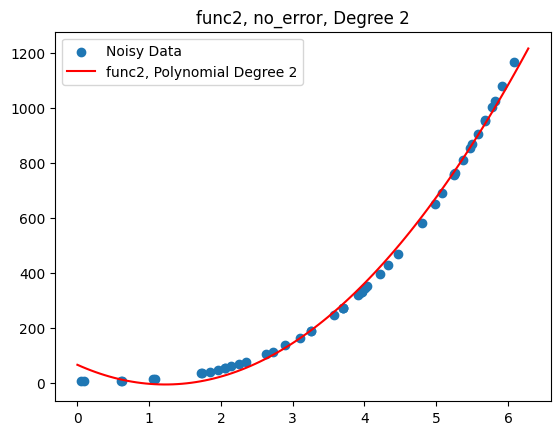

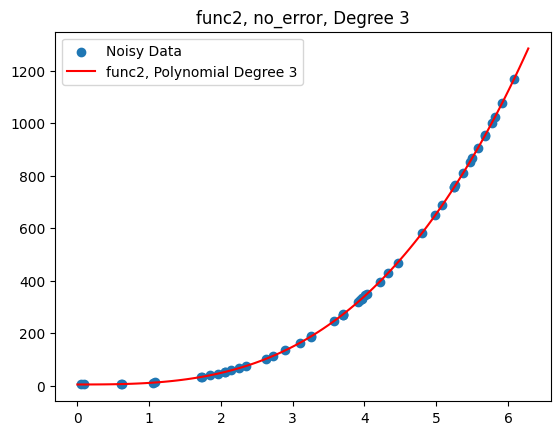

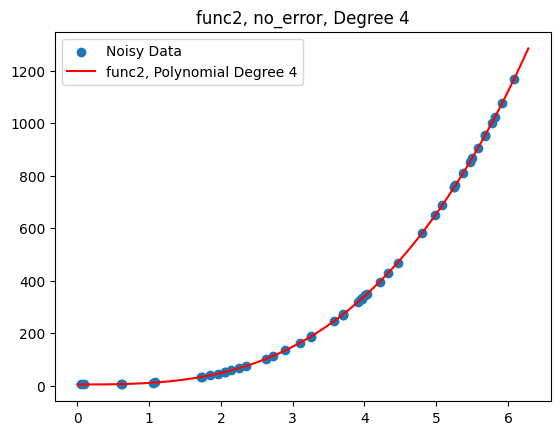

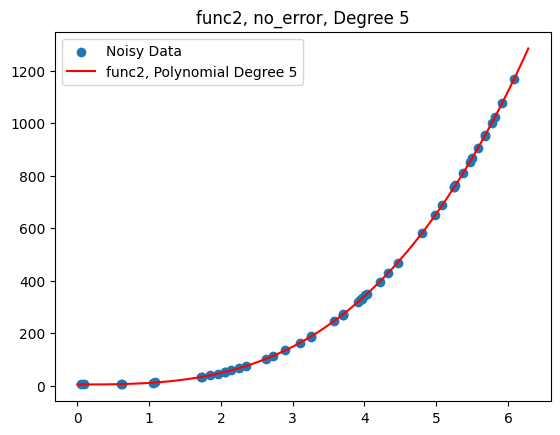

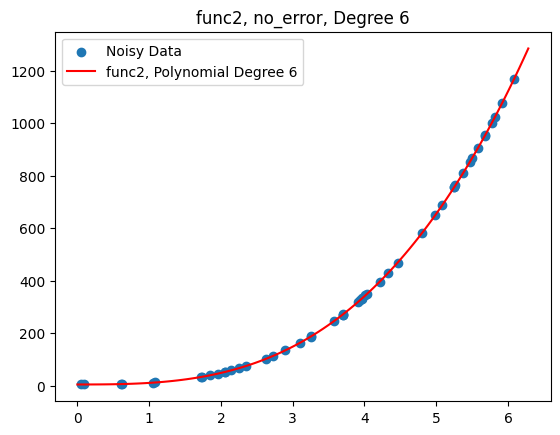

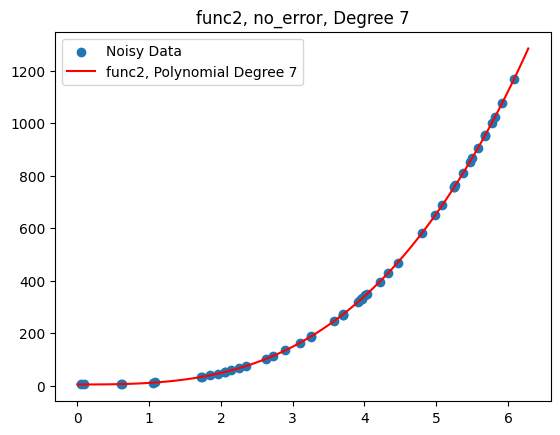

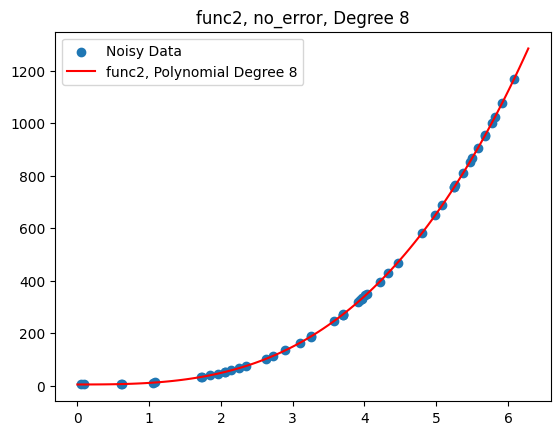

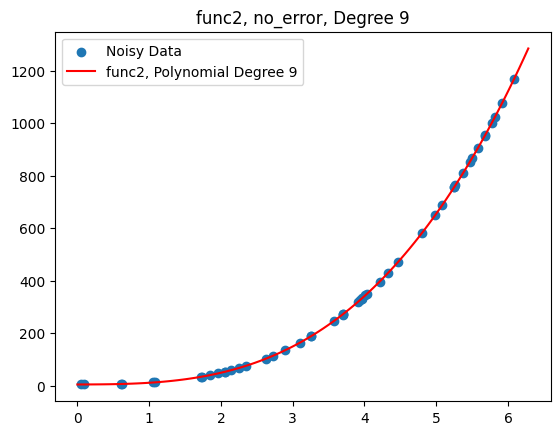

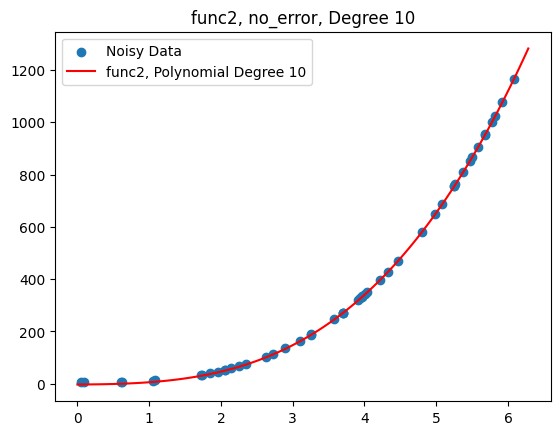

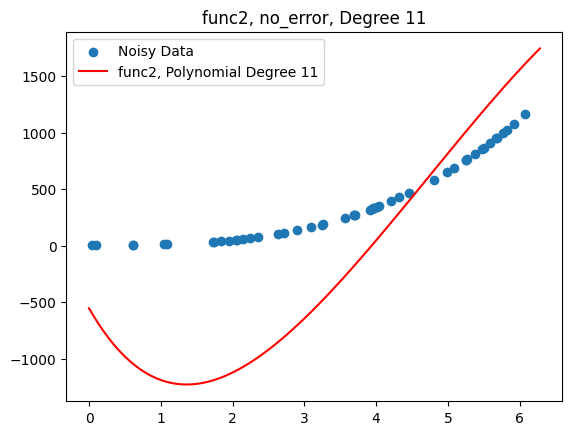

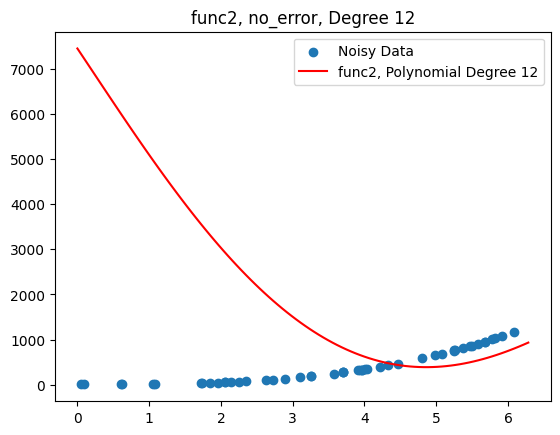

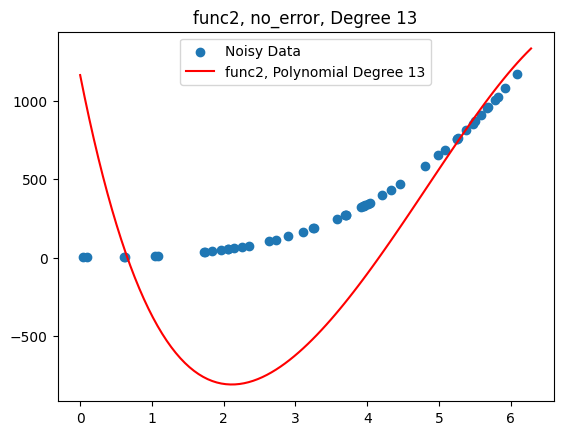

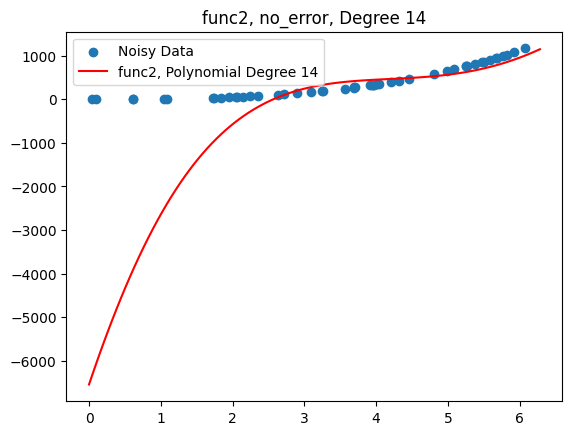

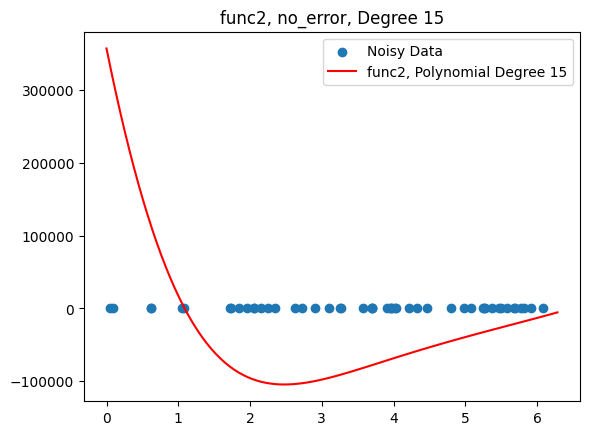

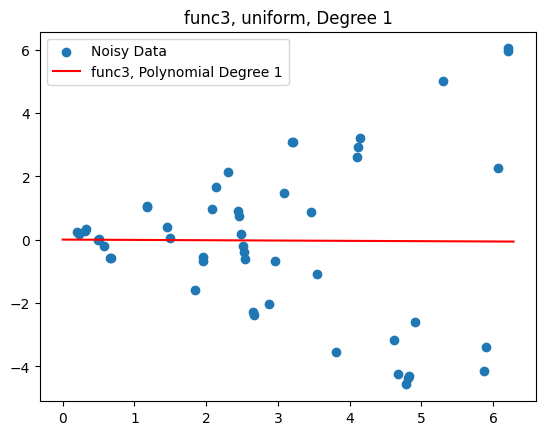

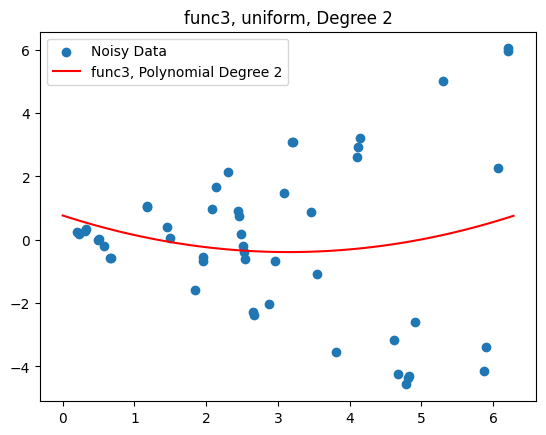

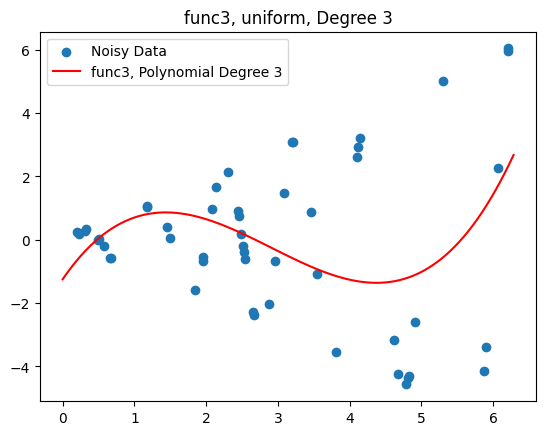

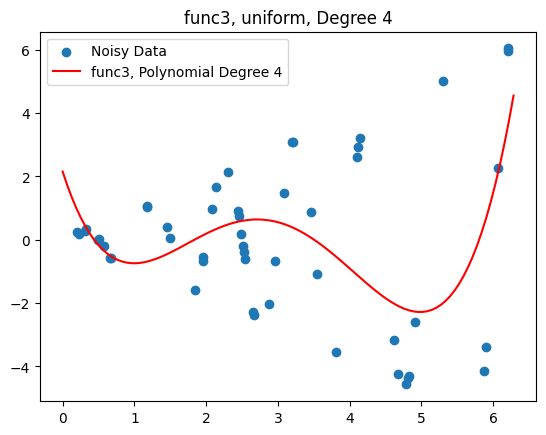

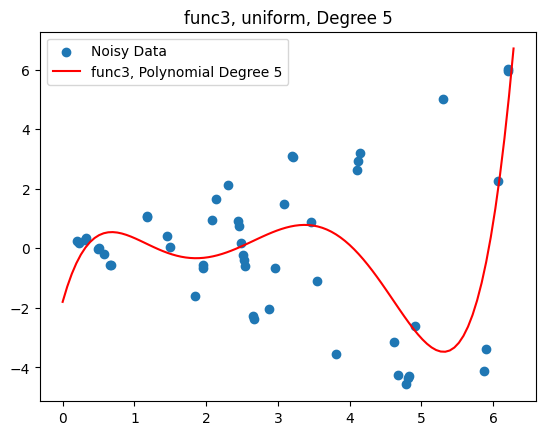

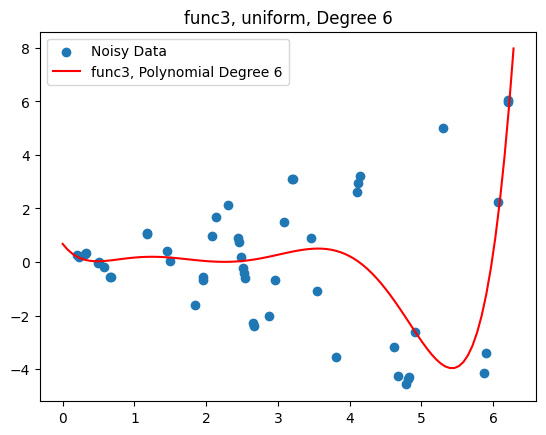

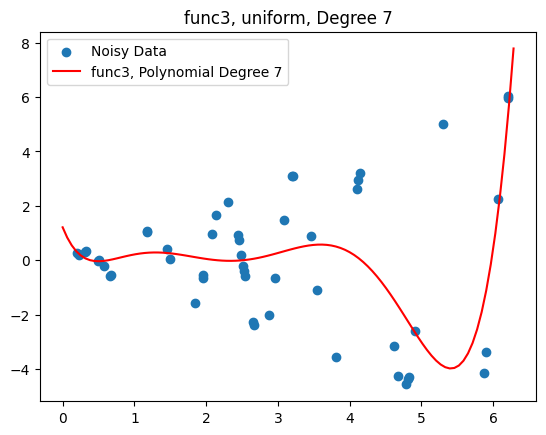

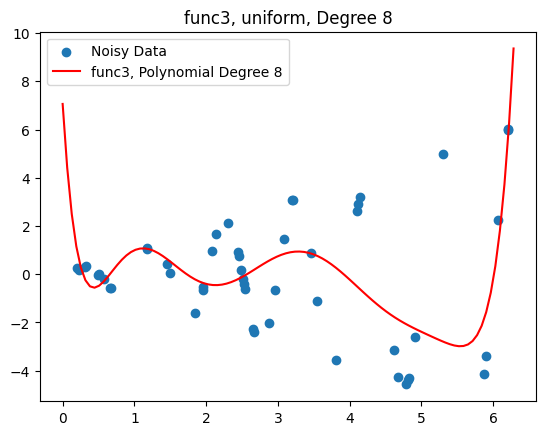

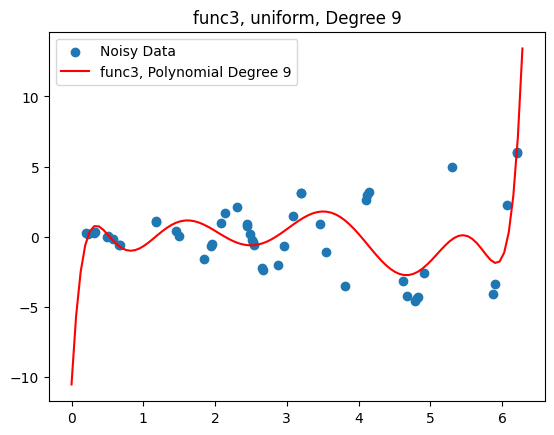

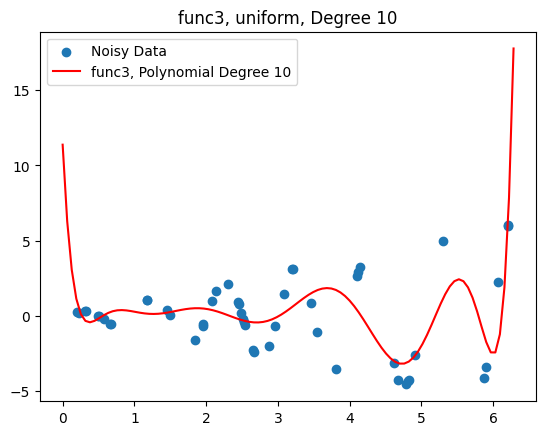

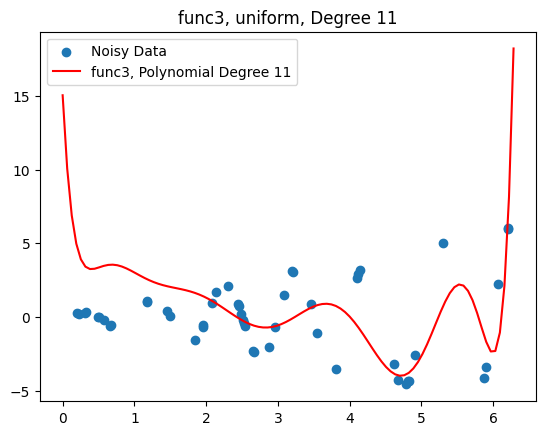

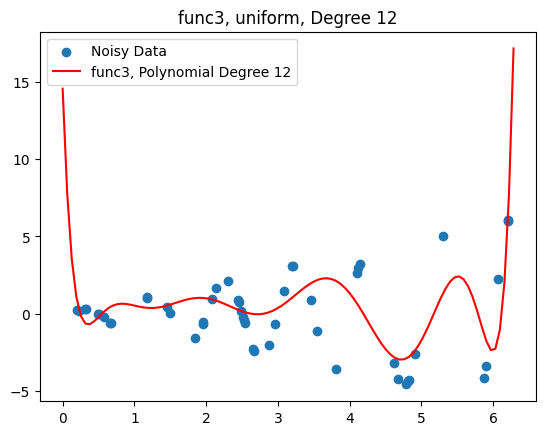

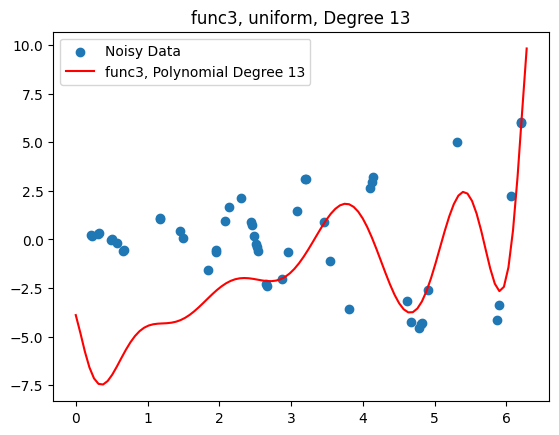

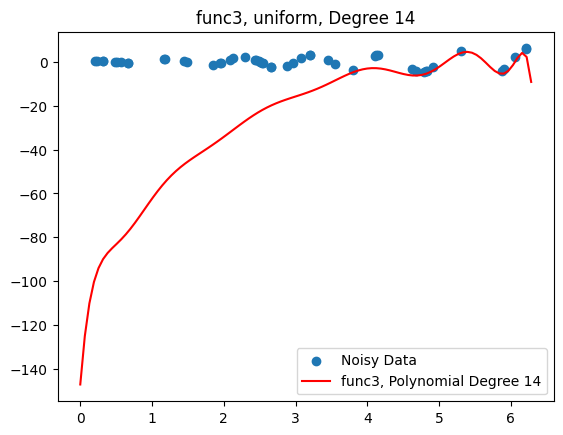

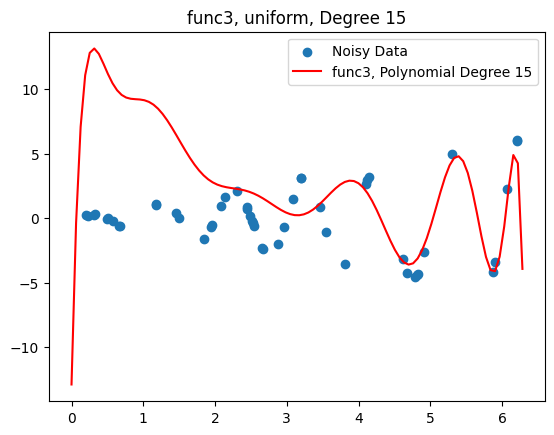

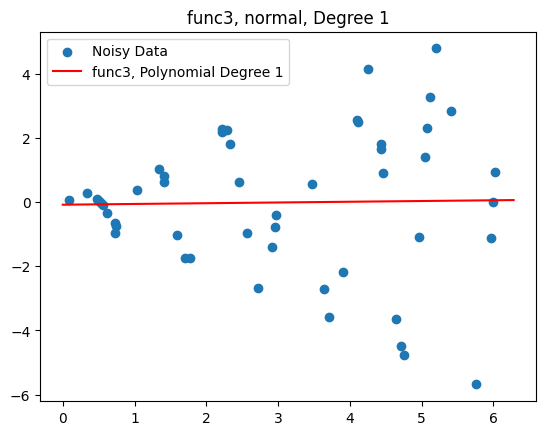

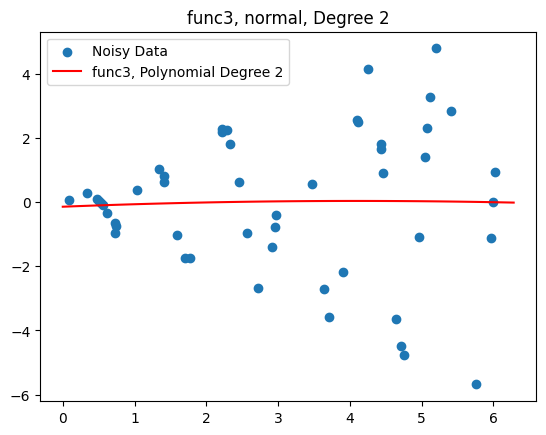

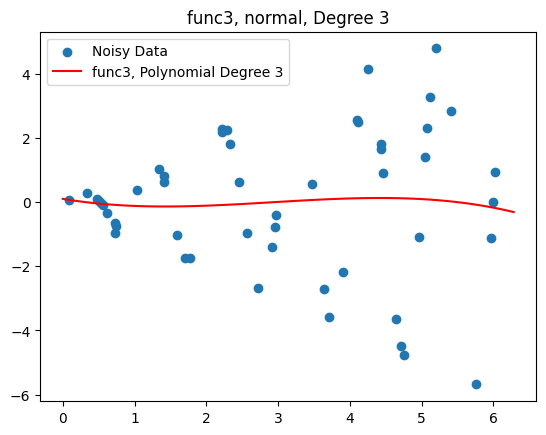

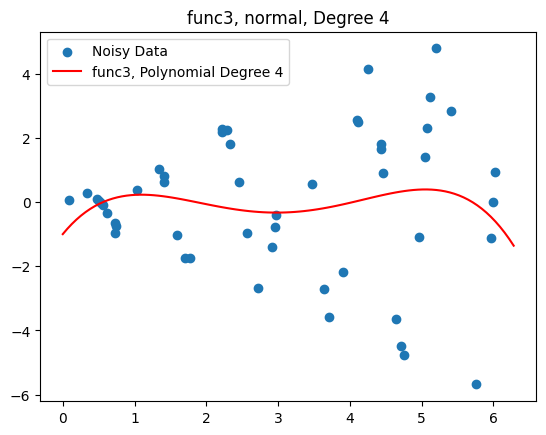

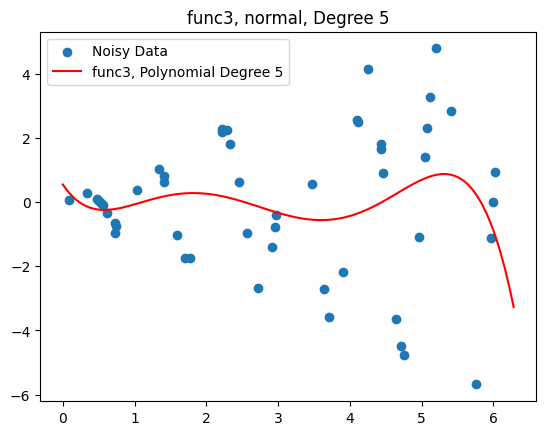

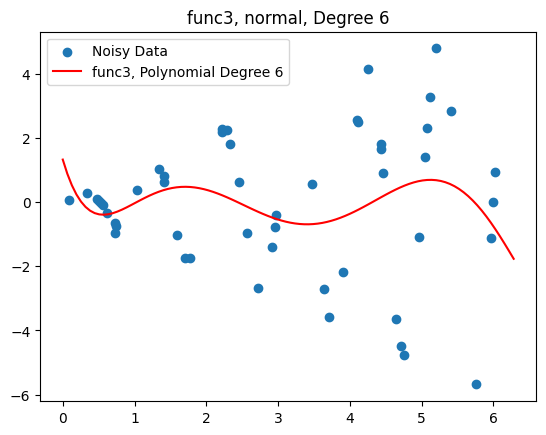

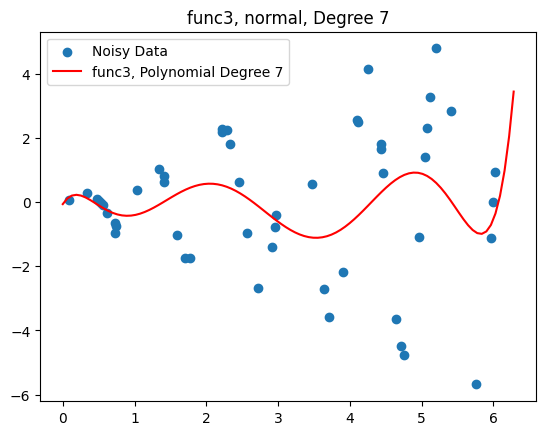

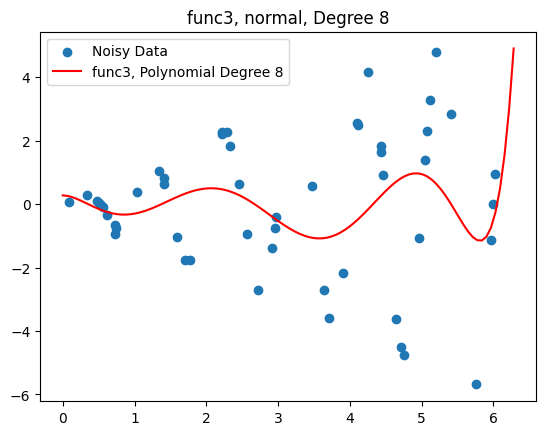

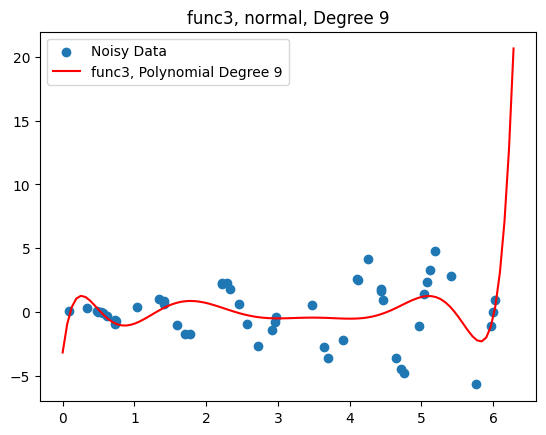

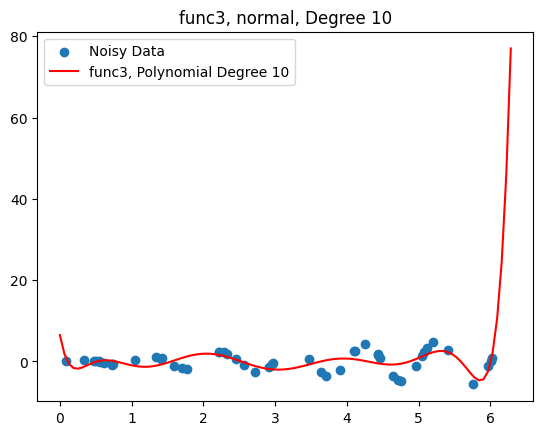

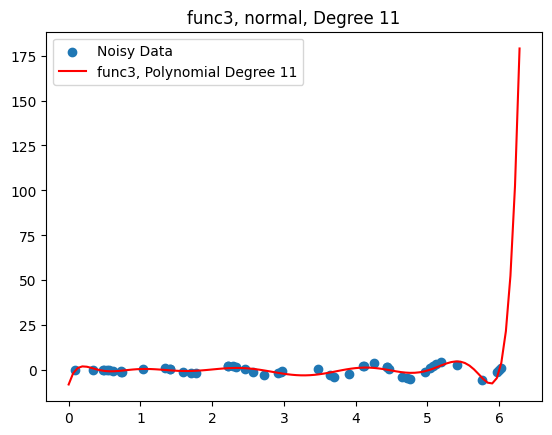

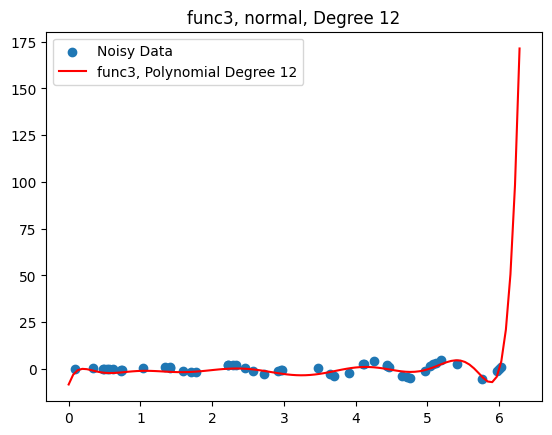

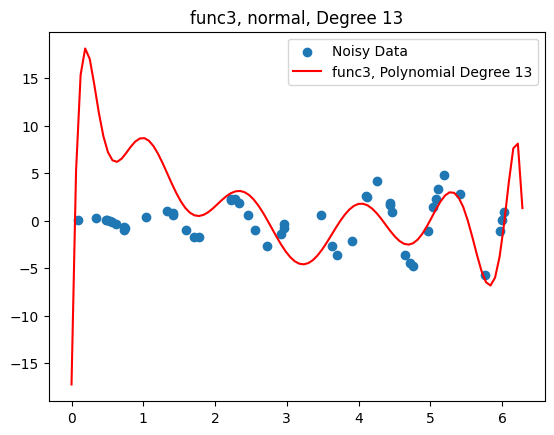

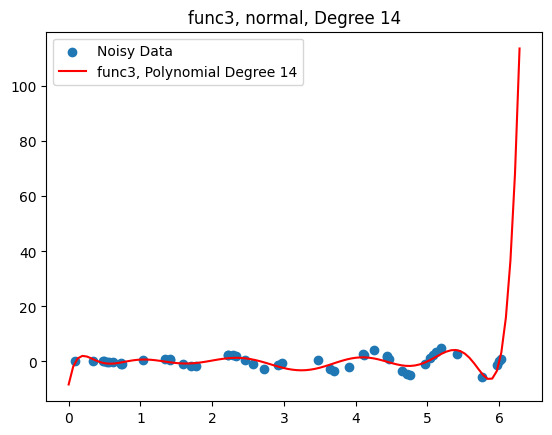

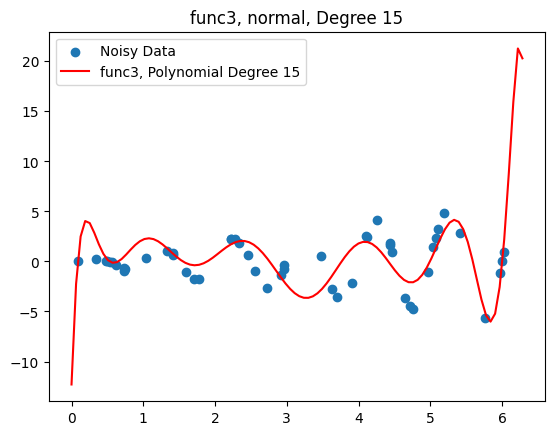

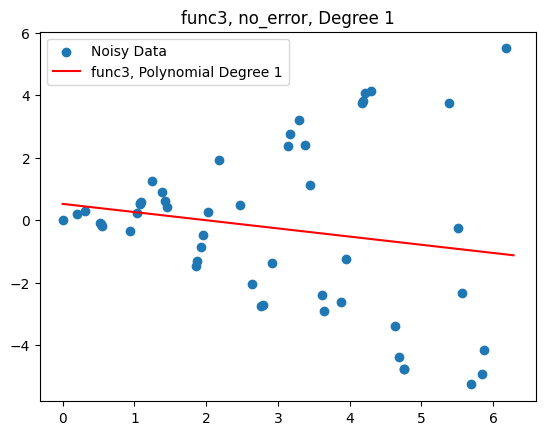

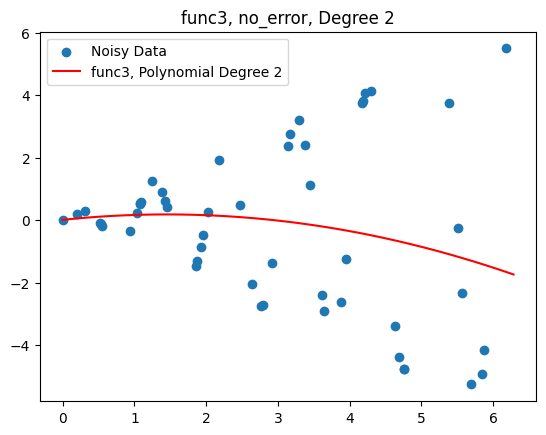

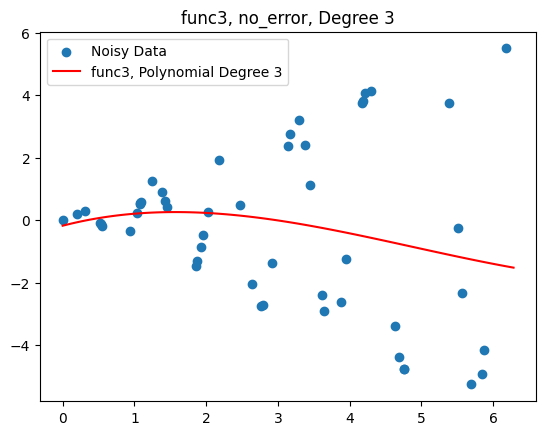

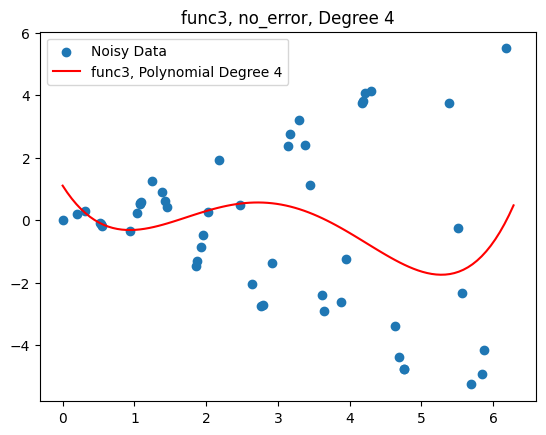

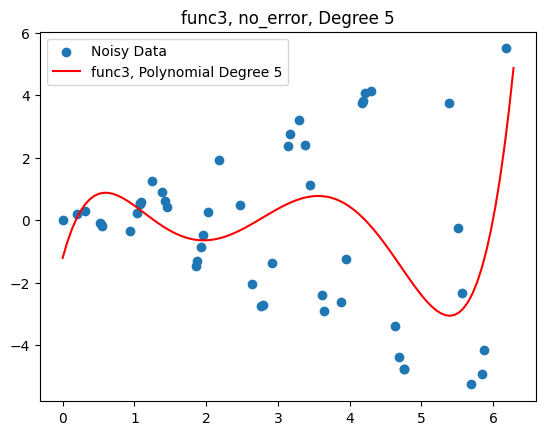

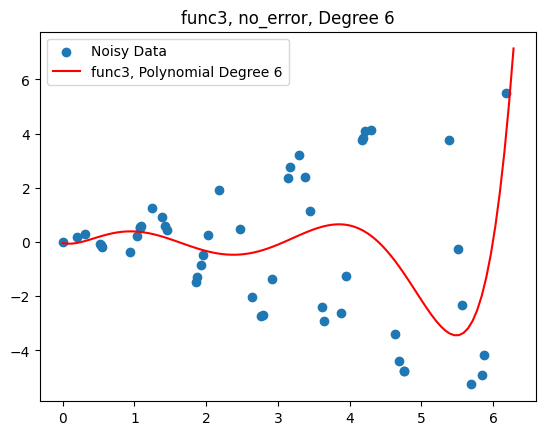

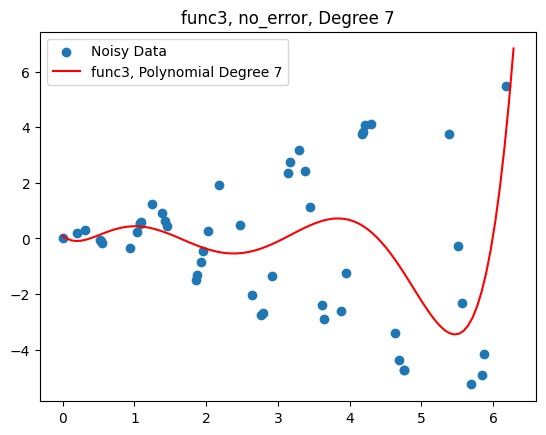

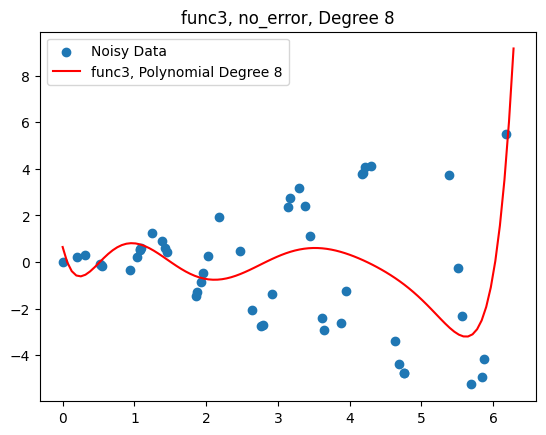

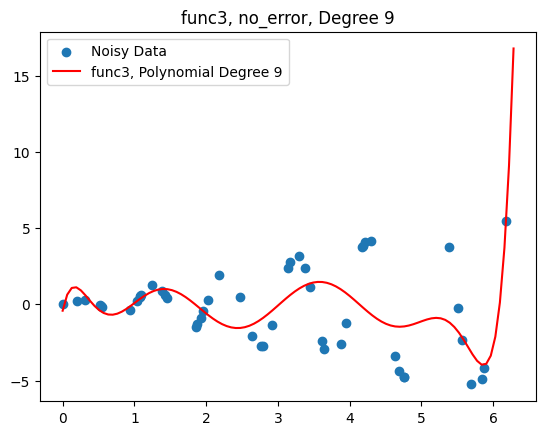

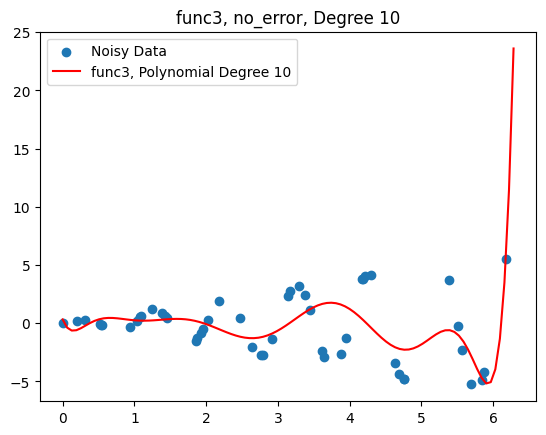

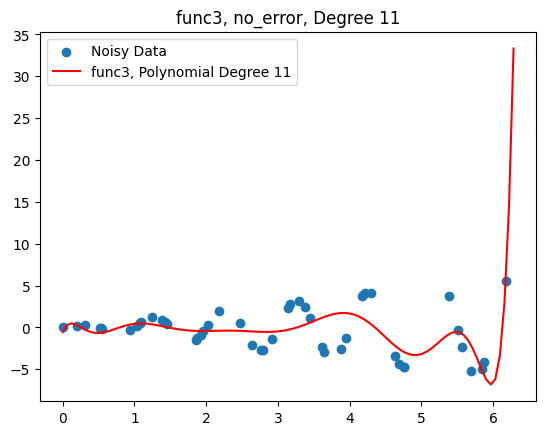

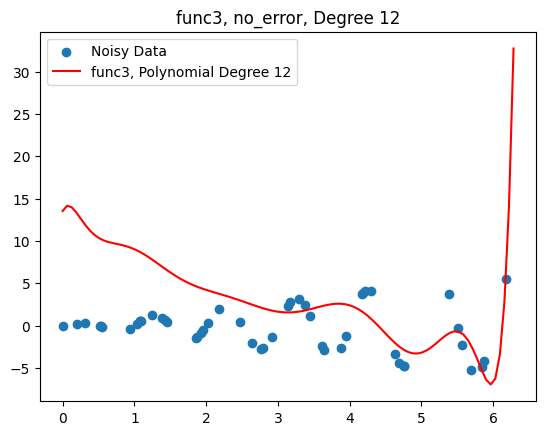

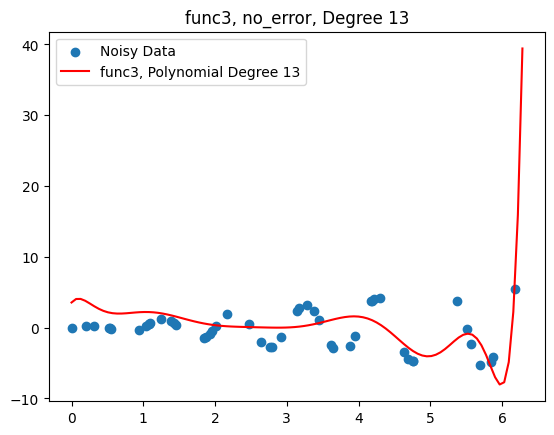

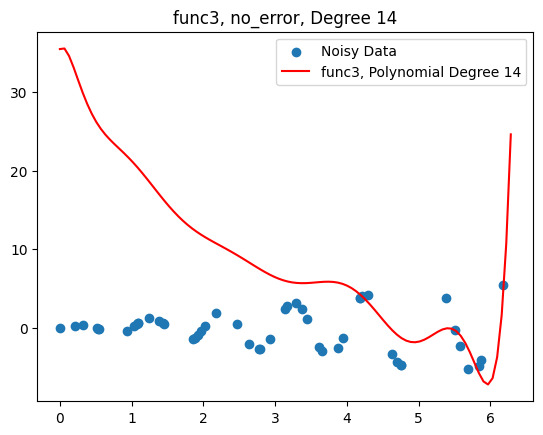

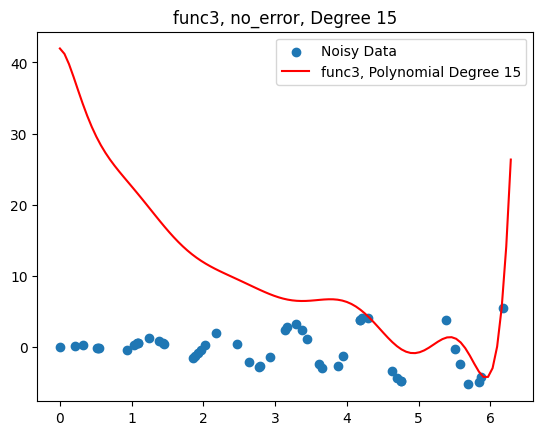

In [6]:
functions = [func1, func2, func3]
errors = ['uniform', 'normal', 'no_error']

for func in functions:
    for error in errors:
        x, y = generate_sample(func, error, size=50)
        for degree in range(1, 16):
            plt.figure()
            polynomial_regression(x, y, degree=degree, func=func, error=error)
            plt.legend()
            plt.show()

1) реализуйте программно регуляризацию для полиномиальной регрессии;
2) покажите, что переобучение может быть устранено при некоторых значениях M и λ.

In [14]:
"""
Для реализации регуляризации в полиномиальной регрессии можно использовать L2, также известную как Ridge регрессию. 
Регуляризация позволяет уменьшить переобучение путем добавления штрафа за большие значения коэффициентов полиномиальной модели. 
В регрессии это обычно достигается добавлением суммы квадратов весов к функции потерь.

Формула для Ridge-регрессии:

Loss = Mean Squared Error + λ * ||w||^2

Где:

    Loss - функция потерь
    Mean Squared Error - среднеквадратичная ошибка
    λ (лямбда) - параметр регуляризации
    w - вектор весов (коэффициентов модели)

Применяя регуляризацию к функциям нахожу значения M (степень полинома) и λ, которые помогут устранить переобучение. 
Экспериментируя с разными значениями λ и степени полинома M, нахожу оптимальные комбинации.
"""
# Функция для создания полиномиальных признаков
def create_polynomial_features(x, degree):
    X_poly = []
    for i in range(degree + 1):
        X_poly.append(x ** i)
    return np.array(X_poly).T

def polynomial_regression_ridge(x, y, degree, alpha):
    # Создаем матрицу признаков X_poly, добавляя столбец с единицами (для свободного члена)
    X_poly = create_polynomial_features(x, degree)

    # Решаем линейную регрессию с регуляризацией
    # матрица Грама
    XTX = X_poly.T @ X_poly 
    # единичная матрица
    identity = np.identity(degree + 1) 
    # уравнение линейной регрессии с регуляризацией Ridge где w - вектор коэффициентов регрессии.
    w = np.linalg.solve(XTX + alpha * identity, X_poly.T @ y) 

    # Генерируем точки для построения графика регрессии 
    x_fit = np.linspace(0, 2 * np.pi, len(y))
    X_fit = []
    for i in range(degree + 1):
        X_fit.append(x_fit ** i)
    X_fit = np.array(X_fit).T
    y_fit = X_fit @ w

    return x_fit, y_fit


best_degree_alpha = {}
for func in functions:
    for error in errors:
        x, y = generate_sample(func, error, size=50)
        best_loss = float('inf')
        best_degree = None
        best_alpha = None

        for degree in range(1, 16):
            for alpha in [0.01, 0.1, 1, 10]:
                x_fit, y_fit = polynomial_regression_ridge(x, y, degree=degree, alpha=alpha)
                loss = np.mean((y - y_fit) ** 2)
                if loss < best_loss:
                    best_loss = loss
                    best_degree = degree
                    best_alpha = alpha

        best_degree_alpha[(func.__name__, error)] = (best_degree, best_alpha)

for key, value in best_degree_alpha.items():
    print(f"Function: {key[0]}, Error: {key[1]}, Best Degree: {value[0]}, Best Alpha: {value[1]}")

Function: func1, Error: uniform, Best Degree: 4, Best Alpha: 10
Function: func1, Error: normal, Best Degree: 1, Best Alpha: 10
Function: func1, Error: no_error, Best Degree: 1, Best Alpha: 10
Function: func2, Error: uniform, Best Degree: 1, Best Alpha: 10
Function: func2, Error: normal, Best Degree: 1, Best Alpha: 10
Function: func2, Error: no_error, Best Degree: 1, Best Alpha: 10
Function: func3, Error: uniform, Best Degree: 1, Best Alpha: 10
Function: func3, Error: normal, Best Degree: 3, Best Alpha: 1
Function: func3, Error: no_error, Best Degree: 5, Best Alpha: 1


Реализуйте программно кросс-валидацию для полиномиальной регрессии с регуляризацией. Определите наилучшую пару (M, λ).

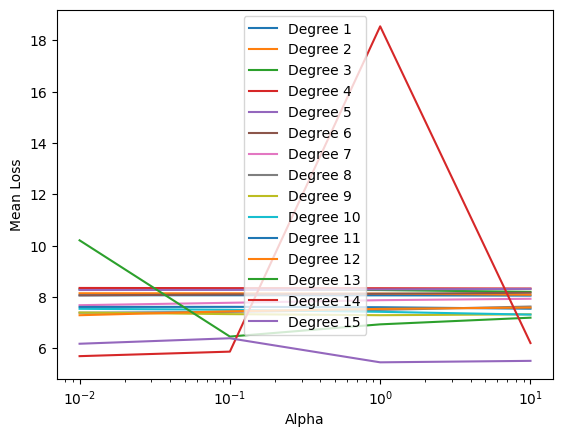

Best Degree: 15, Best Alpha: 1, Best Mean Loss: 5.4458238150339024


In [17]:
# Функция для обучения модели Ridge
def train_ridge_regression(X, y, alpha):
    identity = np.identity(X.shape[1])
    w = np.linalg.solve(X.T @ X + alpha * identity, X.T @ y)
    return w

# Функция для оценки модели на тестовых данных
def evaluate_model(X, y, w):
    y_pred = X @ w
    loss = np.mean((y - y_pred) ** 2)
    return loss

# Генерируем обучающие данные
x, y = generate_sample(func, error, size=100)

# Определяем диапазоны значений M (степень полинома) и λ (параметр регуляризации)
degrees = range(1, 16)
alphas = [0.01, 0.1, 1, 10]

best_degree = None
best_alpha = None
best_mean_loss = float('inf')

# Используем кросс-валидацию для оценки модели
num_folds = 5
fold_size = len(x) // num_folds

mean_losses = np.zeros((len(degrees), len(alphas)))

for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        mean_loss = 0
        for fold in range(num_folds):
            start = fold * fold_size
            end = start + fold_size
            x_train = np.concatenate((x[:start], x[end:]))
            y_train = np.concatenate((y[:start], y[end:]))
            x_test = x[start:end]
            y_test = y[start:end]
            X_train_poly = create_polynomial_features(x_train, degree)
            X_test_poly = create_polynomial_features(x_test, degree)
            w = train_ridge_regression(X_train_poly, y_train, alpha)
            loss = evaluate_model(X_test_poly, y_test, w)
            mean_loss += loss
        mean_loss /= num_folds
        mean_losses[i, j] = mean_loss

best_mean_loss = np.min(mean_losses)
best_degree_index, best_alpha_index = np.where(mean_losses == best_mean_loss)
best_degree = degrees[best_degree_index[0]]
best_alpha = alphas[best_alpha_index[0]]

plt.figure()
for i, degree in enumerate(degrees):
    plt.plot(alphas, mean_losses[i, :], label=f'Degree {degree}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Loss')
plt.legend()
plt.show()

print(f"Best Degree: {best_degree}, Best Alpha: {best_alpha}, Best Mean Loss: {best_mean_loss}")